In [382]:
# Importation de packages

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re
from collections import Counter

# Data_1

### Question de recherche : 
Quels sont les facteurs qui influencent le taux de rejet et les défauts de production dans l'usine ?

### Importation de la base de données

In [43]:
data_1 = pd.read_csv('Data_1.csv')

data_1.head()

lot_id machine_id                   timestamp  temp_c  humidity_pct  \
0  LOT585       MC18  2025-04-03 21:18:23.147679    84.2          75.6   
1  LOT375        MC7  2025-04-19 04:40:33.147679    89.2          45.1   
2  LOT773       MC17  2025-04-11 16:08:43.147679    55.0          77.0   
3  LOT641       MC11         2025-04-18 12:53:50    87.4          36.0   
4  LOT782        MC3         2025-04-19 16:46:57    89.6          49.1   

   pressure_hpa  speed_rpm  vibration_mm operator_id status_code defect_code  \
0        986.88     267.13         1.140         OP1        WARN          D2   
1        958.06     376.81         0.704         OP3        FAIL          D2   
2       1024.33     420.67         4.887         OP3        WARN          D3   
3        959.82      66.97         0.247         OP1        FAIL          D2   
4        976.40     149.65         4.813         OP2        FAIL          D3   

  material_batch  output_qty  reject_qty  cycle_time_s  maintenance_flag  \
0            MB4         298          44         53.04              True   
1            MB1         473          72         55.99             False   
2           MB26         110          44         92.54             False   
3           MB44         391          99         57.01              True   
4           MB16         795          98         73.48             False   

   downtime_min                                        sensor_data location  \
0            27  {'s1': 0.7849665046628179, 's2': 0.89542545546...      NaN   
1            35  {'s1': 0.022985518398961347, 's2': 0.249667683...   PlantA   
2            35  {'s1': 0.7949367118191023, 's2': 0.92241030847...      NaN   
3             1  {'s1': 0.978944648319434, 's2': 0.965873966235...   PlantA   
4            83  {'s1': 0.24239794074555332, 's2': 0.8890960808...   PlantB   

  remarks  
0      OK  
1   Check  
2      OK  
3     NaN  
4   Check

### Nettoyage de la base de données

In [44]:
data_1.info()

# Une question : J'ai remarqué que les variables downtime_min et cycle_time_s reflectent respecivement des minutes et des 
# secondes. Mais ils sont codés integer. Dois-je les laisser ainsi? Si non Comment les coder en minute ou second ? 
# Je n'ai pas trouvé comment faire.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lot_id            6150 non-null   object 
 1   machine_id        6150 non-null   object 
 2   timestamp         6150 non-null   object 
 3   temp_c            6150 non-null   float64
 4   humidity_pct      6150 non-null   float64
 5   pressure_hpa      6150 non-null   float64
 6   speed_rpm         6150 non-null   float64
 7   vibration_mm      6150 non-null   float64
 8   operator_id       4596 non-null   object 
 9   status_code       4579 non-null   object 
 10  defect_code       4630 non-null   object 
 11  material_batch    6150 non-null   object 
 12  output_qty        6150 non-null   int64  
 13  reject_qty        6150 non-null   int64  
 14  cycle_time_s      6150 non-null   float64
 15  maintenance_flag  6150 non-null   bool   
 16  downtime_min      6150 non-null   int64  


In [45]:
data_1["timestamp"] = pd.to_datetime(data_1["timestamp"].str[:13])

In [46]:
data_1.isnull().sum()

lot_id                 0
machine_id             0
timestamp              0
temp_c                 0
humidity_pct           0
pressure_hpa           0
speed_rpm              0
vibration_mm           0
operator_id         1554
status_code         1571
defect_code         1520
material_batch         0
output_qty             0
reject_qty             0
cycle_time_s           0
maintenance_flag       0
downtime_min           0
sensor_data            0
location            2122
remarks             2086
dtype: int64

In [47]:
missing_rate = data_1.isnull().mean() * 100

missing_rate

lot_id               0.000000
machine_id           0.000000
timestamp            0.000000
temp_c               0.000000
humidity_pct         0.000000
pressure_hpa         0.000000
speed_rpm            0.000000
vibration_mm         0.000000
operator_id         25.268293
status_code         25.544715
defect_code         24.715447
material_batch       0.000000
output_qty           0.000000
reject_qty           0.000000
cycle_time_s         0.000000
maintenance_flag     0.000000
downtime_min         0.000000
sensor_data          0.000000
location            34.504065
remarks             33.918699
dtype: float64

In [48]:
data_1clean = data_1

In [49]:
data_1clean.drop(columns = ['remarks', 'location'], inplace = True)

In [50]:
data_1clean['defect_code'] = data_1clean['defect_code'].fillna('NO DEFECT')

data_1clean['operator_id'] = data_1clean['operator_id'].fillna('UNKNOW')

In [51]:
data_1clean['status_code'].value_counts()

WARN    1563
OK      1509
FAIL    1507
Name: status_code, dtype: int64

In [52]:
data_1clean['status_code'] = data_1clean['status_code'].astype('category')

data_1clean['status_code'] = data_1clean['status_code'].cat.add_categories('MISSING').fillna('MISSING')

In [79]:
data_1clean['status_code'].value_counts()

MISSING    1571
WARN       1563
OK         1509
FAIL       1507
Name: status_code, dtype: int64

In [55]:
data_1.isnull().sum()

lot_id              0
machine_id          0
timestamp           0
temp_c              0
humidity_pct        0
pressure_hpa        0
speed_rpm           0
vibration_mm        0
operator_id         0
status_code         0
defect_code         0
material_batch      0
output_qty          0
reject_qty          0
cycle_time_s        0
maintenance_flag    0
downtime_min        0
sensor_data         0
dtype: int64

### Analyse de la base de données

In [54]:
data_1.describe()

temp_c  humidity_pct  pressure_hpa    speed_rpm  vibration_mm  \
count  6150.000000   6150.000000   6150.000000  6150.000000   6150.000000   
mean     57.161642     49.894829    999.952989   248.518553      2.485682   
std      24.551747     17.378390     28.939097   144.218783      1.432360   
min      15.000000     20.000000    950.030000     0.070000      0.000000   
25%      35.800000     34.800000    974.810000   124.662500      1.268250   
50%      56.800000     49.900000    999.670000   247.275000      2.467000   
75%      78.375000     65.300000   1025.260000   372.492500      3.717750   
max     100.000000     80.000000   1050.000000   499.930000      4.999000   

        output_qty   reject_qty  cycle_time_s  downtime_min  
count  6150.000000  6150.000000   6150.000000   6150.000000  
mean    497.770569    49.708130     65.064424     60.311870  
std     287.411675    28.841199     31.753299     34.836588  
min       0.000000     0.000000     10.000000      0.000000  
25%     250.250000    25.000000     37.527500     31.000000  
50%     508.000000    50.000000     64.995000     60.500000  
75%     737.750000    74.000000     92.500000     90.000000  
max    1000.000000   100.000000    120.000000    120.000000

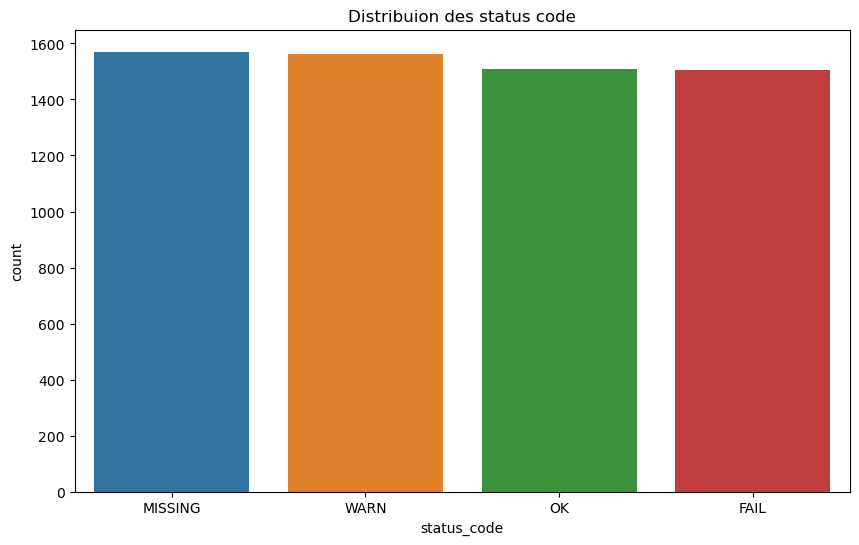

In [100]:
# Distribution des status code

plt.figure(figsize=(10,6))
sns.countplot(data=data_1clean, x='status_code', order=data_1clean['status_code'].value_counts().index)
plt.title('Distribuion des status code')
plt.xticks(rotation=0)
plt.show()

# Problème de fonctionnement peut-être qui peut dégénerer en défauts (Warm élévé) puis à un non fonctionnement du produits (Fail élévé) 

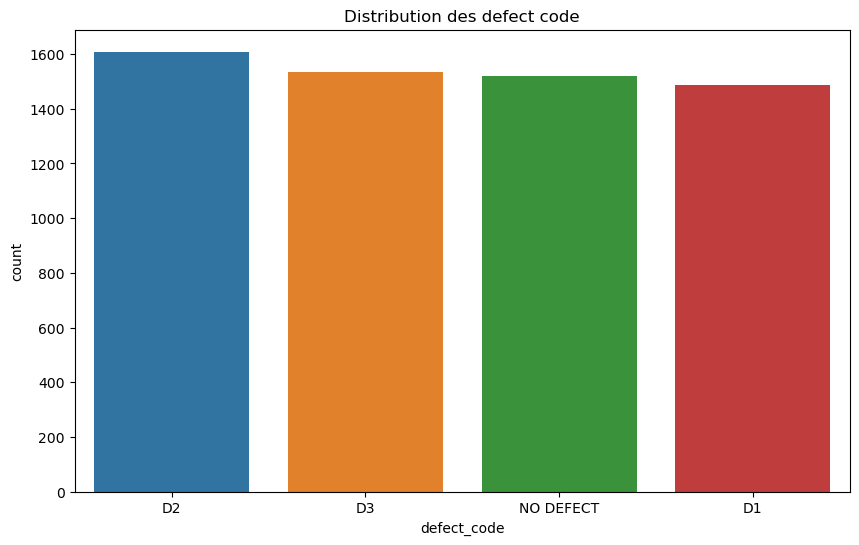

In [101]:
# Distribution des Defect code

plt.figure(figsize=(10,6))
sns.countplot(data=data_1clean, x='defect_code', order=data_1clean['defect_code'].value_counts().index)
plt.title('Distribution des defect code')
plt.xticks(rotation=0)
plt.show()

# Il existe des défauts liés à de causes multiples (tous élévés)

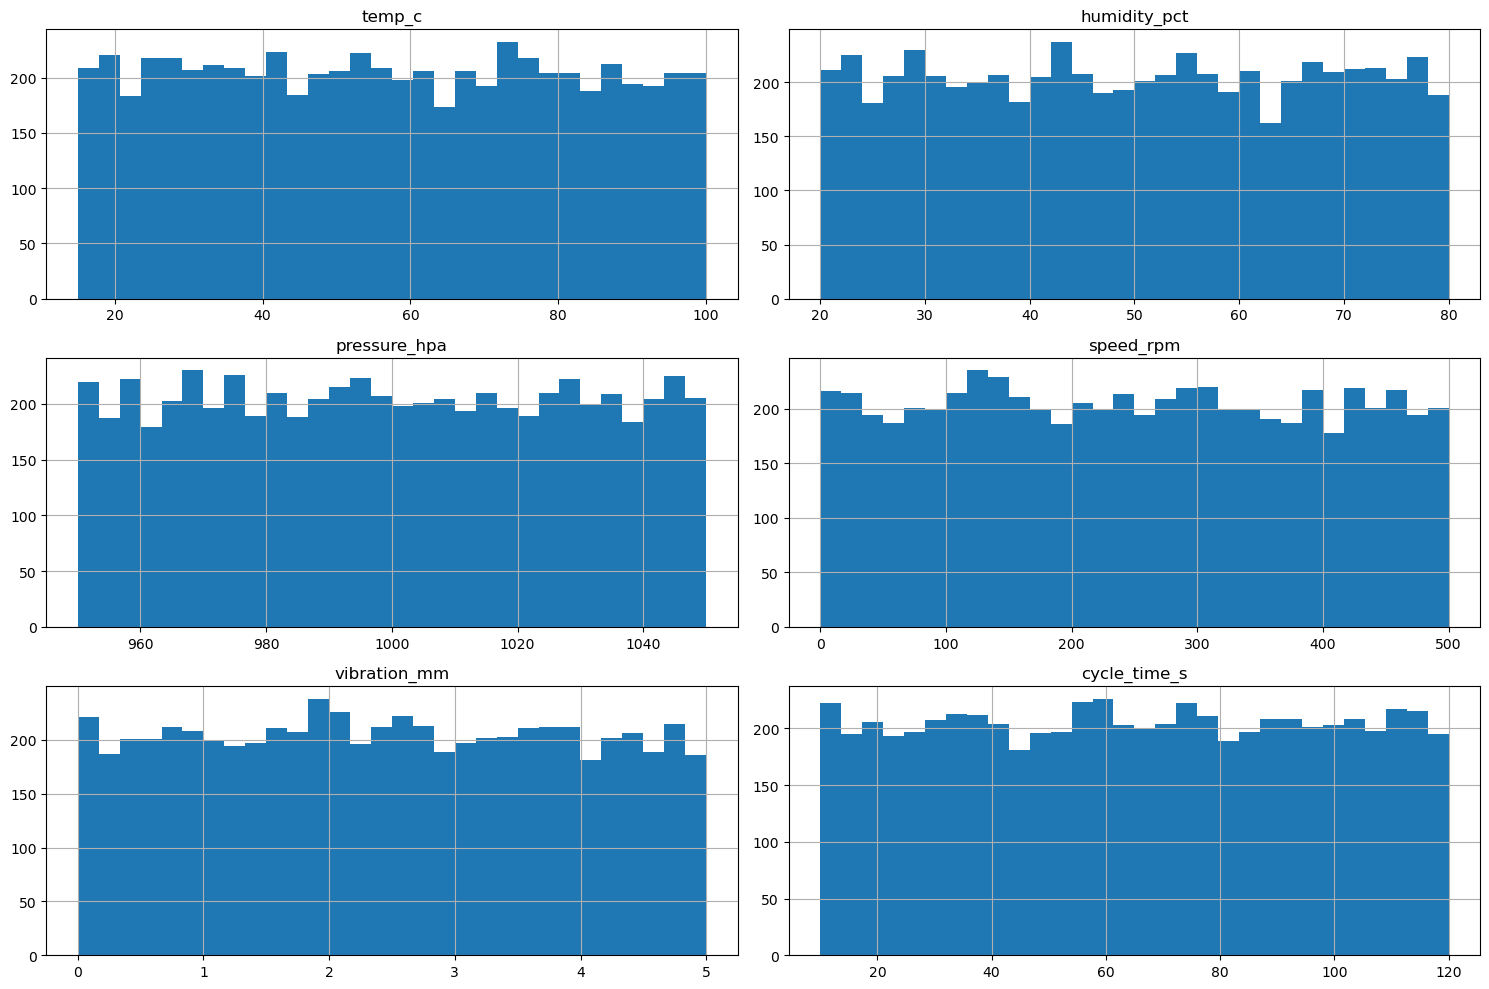

In [106]:
# Distributions des variables numériques présentant les caratéristiques des machines

num_vars = ['temp_c', 'humidity_pct', 'pressure_hpa','speed_rpm', 'vibration_mm', 'cycle_time_s']
df[num_vars].hist(bins=30, figsize = (15,10))
plt.tight_layout()
plt.show()

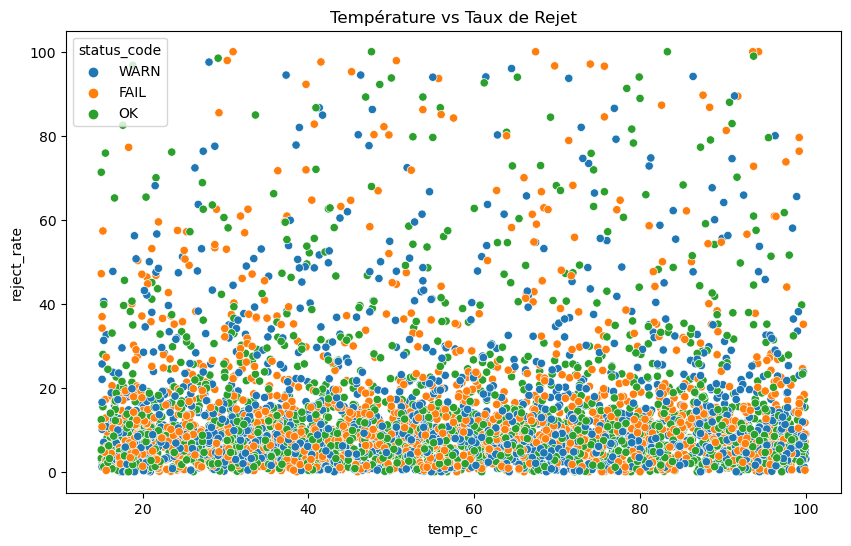

In [107]:
# Taux de rejet
df['reject_rate'] = df['reject_qty'] / (df['output_qty'] + df['reject_qty']) * 100

# Relation entre température et taux de rejet

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp_c', y='reject_rate', hue='status_code')
plt.title('Température vs Taux de rejet')
plt.show()

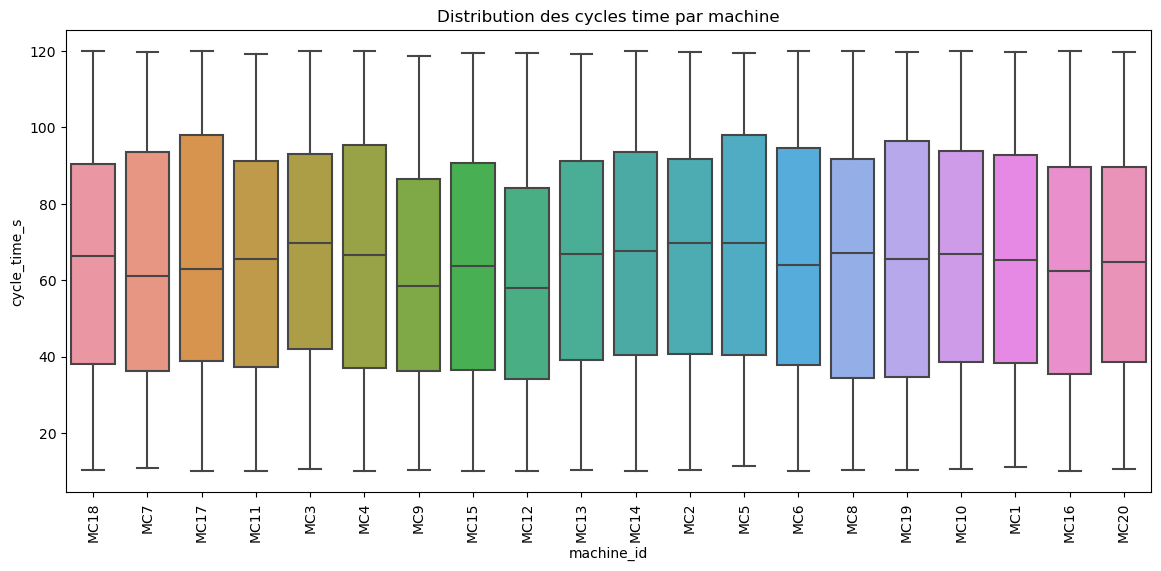

In [108]:
# Boxplot des temps de cycle par machine

plt.figure(figsize=(14, 6))
sns.boxplot(data=data_1clean, x='machine_id', y='cycle_time_s')
plt.title('Distribution des cycles time par machine')
plt.xticks(rotation=90)
plt.show()

# Le cycle time de certaines machines varient à peu près, elles ne sont donc pas stables.

In [110]:
# Performance par machine id

mac_per = df.groupby('machine_id').agg({
    'output_qty': 'sum',
    'reject_qty': 'sum',
    'reject_rate': 'mean',
    'status_code': lambda x: (x == 'FAIL').mean() * 100
}).sort_values('reject_rate', ascending=False)

mac_per.head(5)

output_qty  reject_qty  reject_rate  status_code
machine_id                                                  
MC8             152011       16612    16.752862    25.986842
MC9             143019       14757    16.540426    25.165563
MC20            144270       15296    15.622353    24.350649
MC13            148311       15674    15.266156    22.903226
MC15            146672       14911    14.979582    25.418060

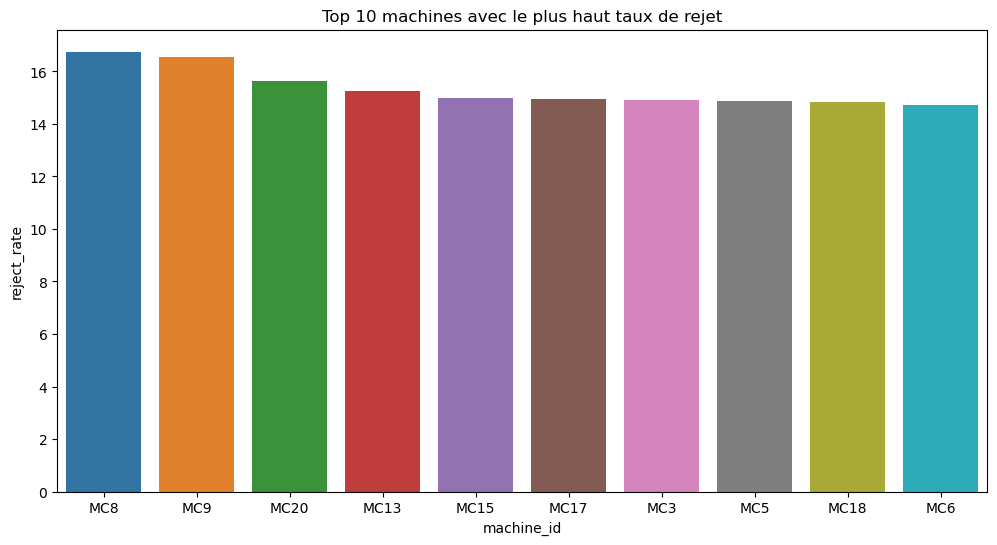

In [111]:
# Visualization 

plt.figure(figsize=(12,6))
sns.barplot(data=mac_per.reset_index().head(10), x='machine_id', y='reject_rate')
plt.title('Top 10 machines avec le plus haut taux de rejet')
plt.xticks(rotation=0)
plt.show()

In [114]:
# Performances par opérator id

op_per = df.groupby('operator_id').agg({
    'output_qty': 'sum',
    'reject_qty': 'sum',
    'reject_rate': 'mean',
    'status_code': lambda x: (x == 'FAIL').mean() * 100
}).sort_values('reject_rate', ascending=False)

op_per.head()

output_qty  reject_qty  reject_rate  status_code
operator_id                                                  
OP2              747849       73819    14.497532    23.097643
OP1              795888       79584    14.385129    26.566416
OP3              754772       75149    14.317316    24.686469

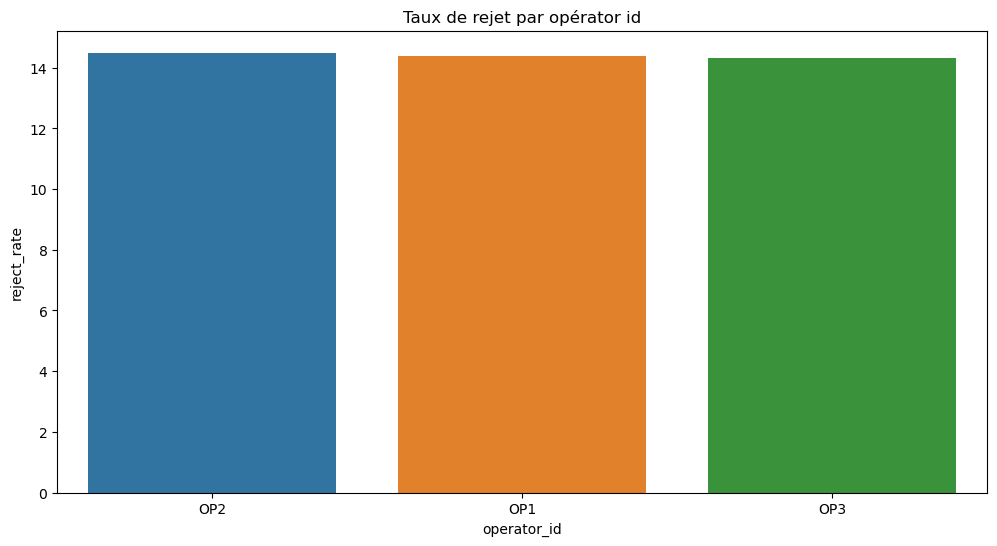

In [116]:
# Visualisation

plt.figure(figsize=(12, 6))
sns.barplot(data=op_per.reset_index(), x='operator_id', y='reject_rate')
plt.title('Taux de rejet par opérator id')
plt.xticks(rotation=0)
plt.show()

In [117]:
# Performances par lot de matériau

mat_per = df.groupby('material_batch').agg({
    'output_qty': 'sum',
    'reject_qty': 'sum',
    'reject_rate': 'mean',
    'status_code': lambda x: (x == 'FAIL').mean() * 100
}).sort_values('reject_rate', ascending=False)

mat_per.head()

output_qty  reject_qty  reject_rate  status_code
material_batch                                                  
MB18                 43136        5038    18.564133    25.252525
MB26                 62288        7040    17.277416    20.588235
MB31                 56979        6625    17.032927    23.770492
MB47                 53319        5715    17.032666    19.298246
MB39                 53952        6185    16.392842    21.774194

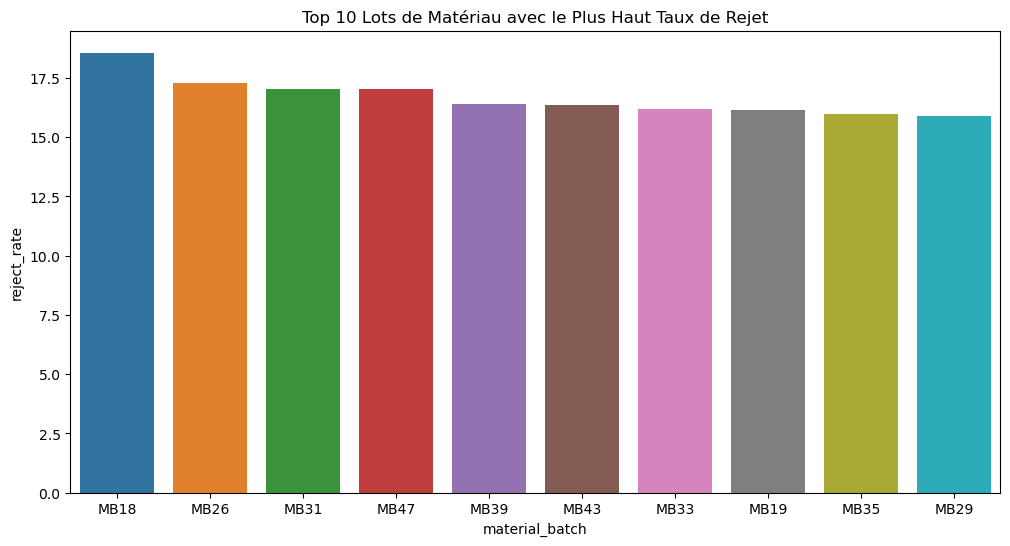

In [119]:
# Visualisation

plt.figure(figsize=(12, 6))
sns.barplot(data=mat_per.reset_index().head(10), x='material_batch', y='reject_rate')
plt.title('Top 10 Lots de Matériau avec le Plus Haut Taux de Rejet')
plt.xticks(rotation=0)
plt.show()

In [121]:
# Temps d'arrêt par machine

dt_ana = df.groupby('machine_id').agg({
    'downtime_min': 'sum',
    'maintenance_flag': 'sum',
    'lot_id': 'count'
}).sort_values('downtime_min', ascending=False)

dt_ana['dt_per_op'] = dt_ana['downtime_min'] / dt_ana['lot_id']
dt_ana.head()

downtime_min  maintenance_flag  lot_id  dt_per_op
machine_id                                                   
MC12               20652               168     312  66.192308
MC6                20100               160     329  61.094225
MC20               19954               147     308  64.785714
MC19               19897               174     344  57.840116
MC10               19720               151     320  61.625000

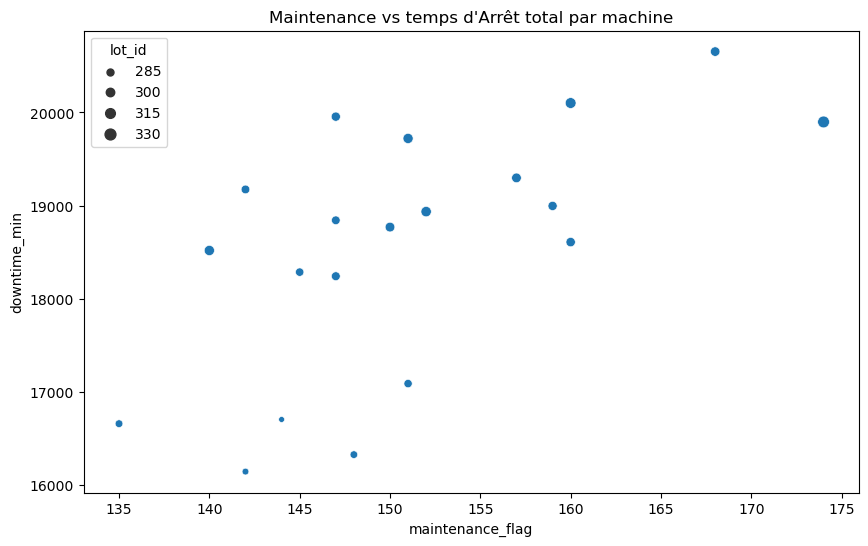

In [123]:
# Relation entre maintenance et temps d'arrêt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dt_ana, 
                x='maintenance_flag', 
                y='downtime_min',
                size='lot_id')
plt.title('Maintenance vs temps d\'Arrêt total par machine')
plt.show()

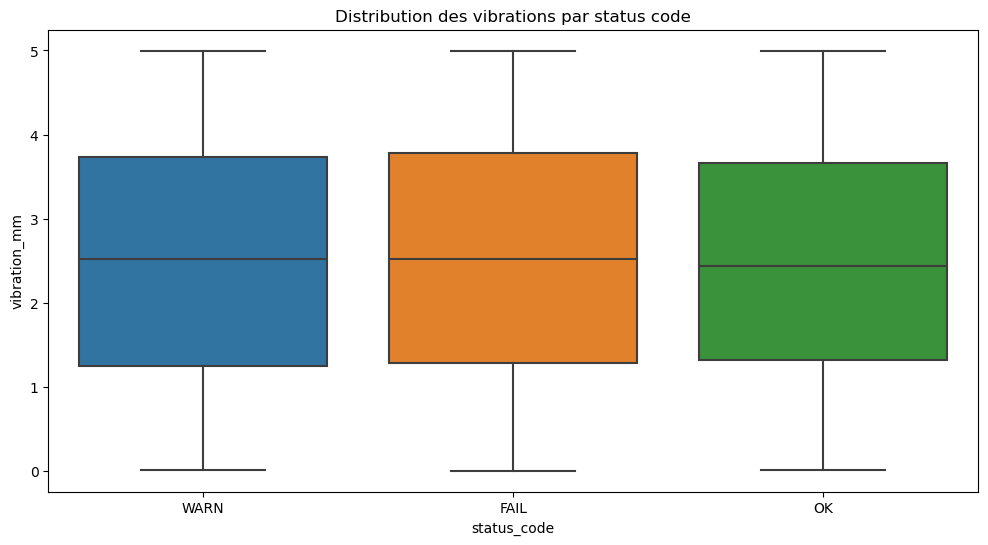

In [124]:
# Relation entre vibration et défauts

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='status_code', y='vibration_mm')
plt.title('Distribution des vibrations par status code')
plt.show()

# Data_2

### Question de recherche : 
Quels sont les facteurs qui influencent les pannes ?

In [134]:
# Importation de la base

data_2 = pd.read_csv('Data_2.csv')

data_2.head()

sensor_id                 recorded_at  temp_c  humidity_%  pressure_hpa  \
0  sensor_5  2025-04-28 17:53:35.267671  -16.22        70.4       1023.74   
1  sensor_6  2025-04-28 03:59:35.267671    3.23        65.7       1041.23   
2  sensor_4         2025/04/28 13:21:35   24.54        14.0        987.42   
3  sensor_4  2025-04-28 11:55:35.267671   13.86        98.6       1005.06   
4  sensor_4  2025-04-27 22:37:35.267671    4.68        74.3       1068.02   

   battery_v status_code  signal_dbm  
0       3.29          OK         -51  
1       2.82        WARN         -50  
2       3.66        WARN         -88  
3       3.31          OK         -76  
4       2.83        WARN         -42

### Nettoyage de la base

In [135]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78950 entries, 0 to 78949
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sensor_id     78950 non-null  object 
 1   recorded_at   78950 non-null  object 
 2   temp_c        78950 non-null  float64
 3   humidity_%    78950 non-null  float64
 4   pressure_hpa  78950 non-null  float64
 5   battery_v     78950 non-null  float64
 6   status_code   78950 non-null  object 
 7   signal_dbm    78950 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.8+ MB


In [136]:
data_2["recorded_at"] = pd.to_datetime(data_2["recorded_at"].str[:13])

In [137]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78950 entries, 0 to 78949
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   sensor_id     78950 non-null  object        
 1   recorded_at   78950 non-null  datetime64[ns]
 2   temp_c        78950 non-null  float64       
 3   humidity_%    78950 non-null  float64       
 4   pressure_hpa  78950 non-null  float64       
 5   battery_v     78950 non-null  float64       
 6   status_code   78950 non-null  object        
 7   signal_dbm    78950 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 4.8+ MB


In [138]:
data_2.isnull().sum()

sensor_id       0
recorded_at     0
temp_c          0
humidity_%      0
pressure_hpa    0
battery_v       0
status_code     0
signal_dbm      0
dtype: int64

### Analyse de la base

In [140]:
data_2.describe()

temp_c    humidity_%  pressure_hpa     battery_v    signal_dbm
count  78950.000000  78950.000000  78950.000000  78950.000000  78950.000000
mean      15.007440     50.215327   1000.010224      3.349050    -65.024205
std       20.170748     28.854747     57.622152      0.491599     20.496486
min     -100.000000      0.000000    900.000000      2.500000   -100.000000
25%       -2.280000     25.300000    950.222500      2.920000    -83.000000
50%       14.930000     50.300000    999.820000      3.350000    -65.000000
75%       32.390000     75.300000   1049.610000      3.780000    -47.000000
max      100.000000    100.000000   1100.000000      4.200000    -30.000000

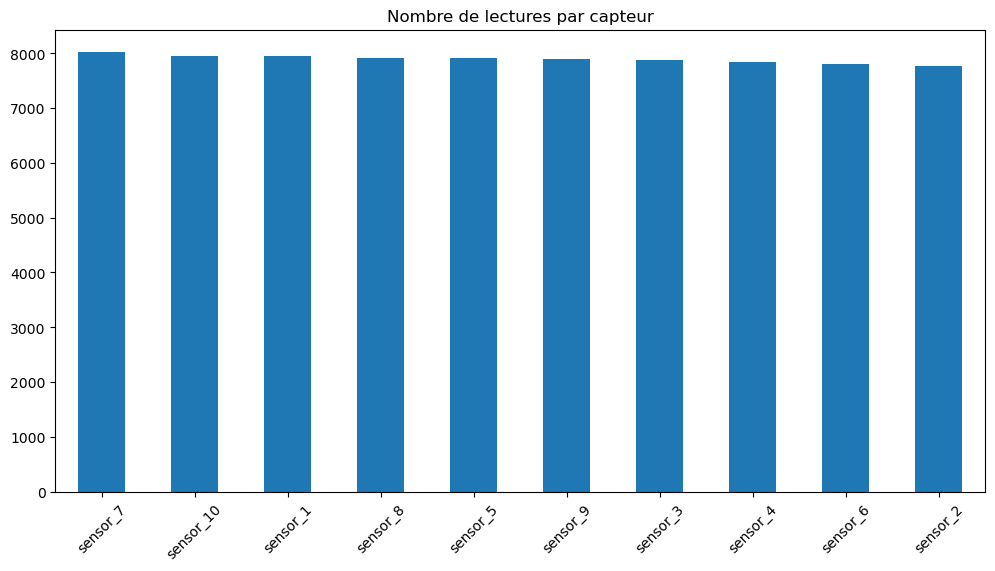

In [145]:
# Nombre de lectures par capteur

plt.figure(figsize=(12, 6))
data_2['sensor_id'].value_counts().plot(kind='bar')
plt.title('Nombre de lectures par capteur')
plt.xticks(rotation=45)
plt.show()

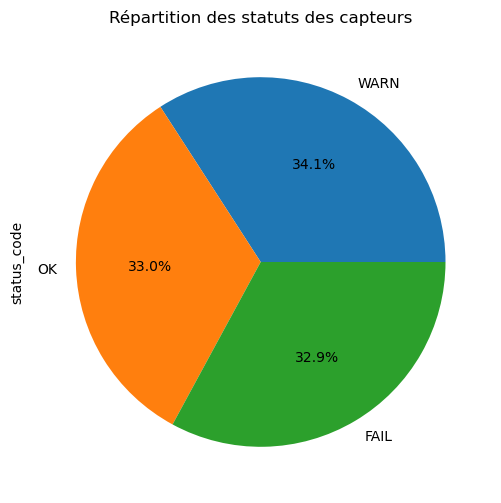

In [146]:
# Statut des capteurs

plt.figure(figsize=(8, 6))
df['status_code'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des statuts des capteurs')
plt.show()

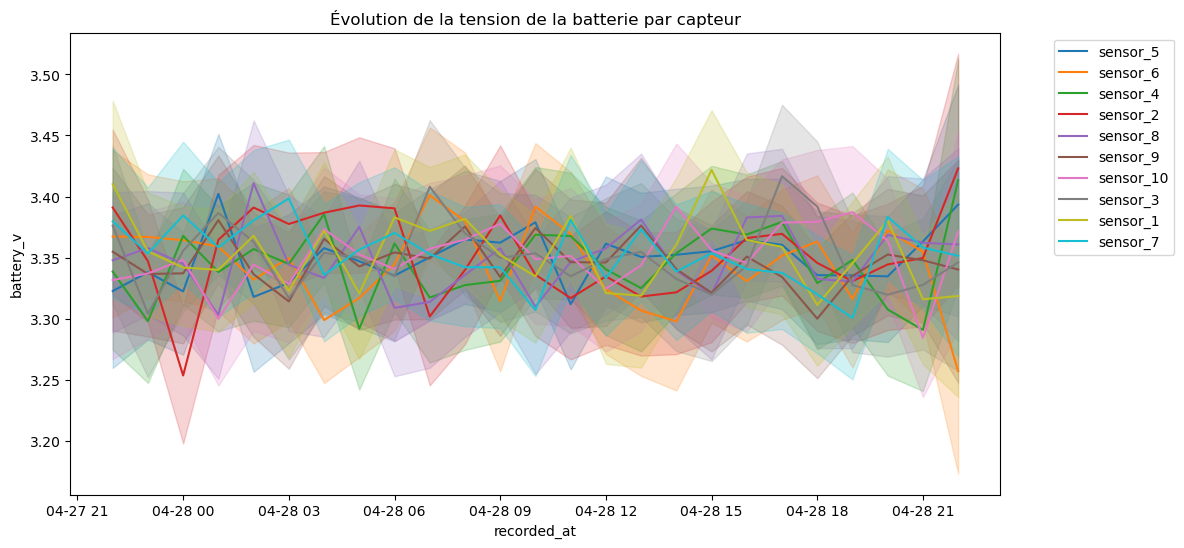

In [151]:
# Évolution de la batterie dans le temps

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_2, x='recorded_at', y='battery_v', hue='sensor_id')
plt.title('Évolution de la tension de la batterie par capteur')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

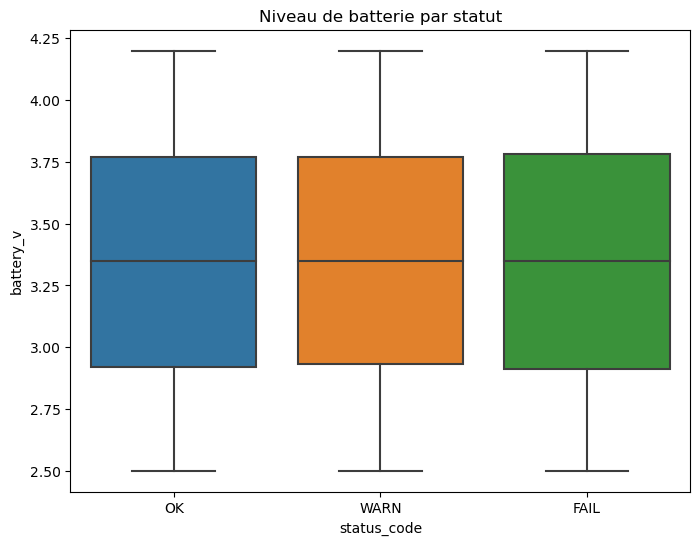

In [152]:
# Batterie vs statut

plt.figure(figsize=(8, 6))
sns.boxplot(data=data_2, x='status_code', y='battery_v')
plt.title('Niveau de batterie par statut')
plt.show()

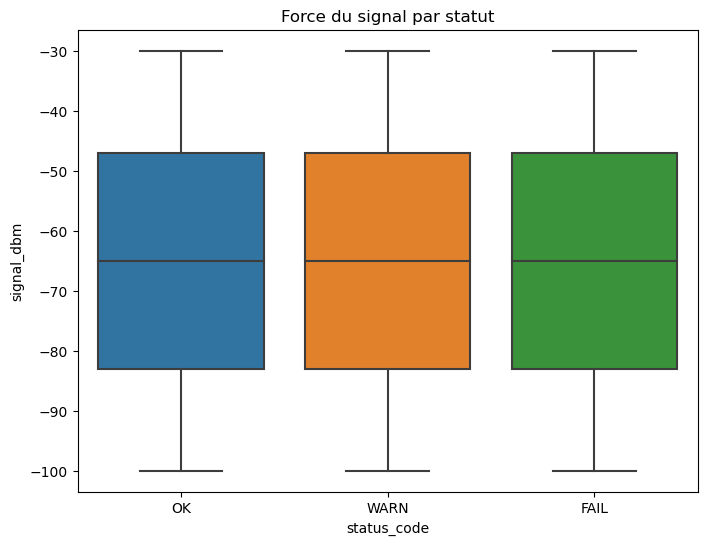

In [153]:
# Signal par statut

plt.figure(figsize=(8, 6))
sns.boxplot(data=data_2, x='status_code', y='signal_dbm')
plt.title('Force du signal par statut')
plt.show()

# Data_3

### Question de recherche : 
Comment les conditions météorologiques extrêmes affectent-elles la qualité de l'air et le confort climatique ?

### Importation de la base 

In [171]:
data_3 = pd.read_csv('Data_3.csv')

data_3.head()

station_id                   timestamp  temp_C  humidity_pct  pressure_hPa  \
0      ST209         2025-04-26T06:21:48    -1.9          91.8       1025.91   
1      ST730         2025-04-24T22:21:48    25.5          42.7        995.17   
2      ST819         2025-04-22T23:21:48    26.5          78.4       1016.75   
3      ST873         2025-04-26T13:21:48    13.8          65.6       1033.44   
4      ST767  2025-04-26 22:21:48.916600     0.7          68.8        993.00   

   wind_speed_kmh wind_dir  precip_mm  uv_index  visibility_km  \
0            92.7        E      32.47      10.3           2.85   
1           130.6        N      48.79       4.2           9.61   
2            52.1        E      21.21       3.6           1.97   
3            88.9        E       8.23      10.6           4.18   
4            37.0        N       1.17       1.0           1.50   

   solar_radiation  dew_point  aqi  pollen_count weather_code  location_lat  \
0           1186.0        7.4   89            14          NaN    -36.825688   
1            284.0        6.2  181            99          Fog    -27.365369   
2            695.3       19.6  419           154         Snow     50.253085   
3           1153.4        7.7  395             9         Rain    -36.156236   
4            375.7       22.9  171           236        Sunny     -5.363414   

   location_lon sensor_status calibration_date                   metadata_info  
0    -97.561149           NaN       15/06/2025    {'unit': 'metric', 'ver': 3}  
1    131.438262         ERROR       02/01/2025  {'unit': 'imperial', 'ver': 3}  
2     93.725183            OK       13/11/2025  {'unit': 'imperial', 'ver': 3}  
3    118.899616           NaN       14/03/2026    {'unit': 'metric', 'ver': 1}  
4     10.836525           NaN       03/06/2024  {'unit': 'imperial', 'ver': 3}

### Nettoyage de la base 

In [172]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19660 entries, 0 to 19659
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station_id        19660 non-null  object 
 1   timestamp         19660 non-null  object 
 2   temp_C            19660 non-null  float64
 3   humidity_pct      19660 non-null  float64
 4   pressure_hPa      19660 non-null  float64
 5   wind_speed_kmh    19660 non-null  float64
 6   wind_dir          16372 non-null  object 
 7   precip_mm         19660 non-null  float64
 8   uv_index          19660 non-null  float64
 9   visibility_km     19660 non-null  float64
 10  solar_radiation   19660 non-null  float64
 11  dew_point         19660 non-null  float64
 12  aqi               19660 non-null  int64  
 13  pollen_count      19660 non-null  int64  
 14  weather_code      15652 non-null  object 
 15  location_lat      19660 non-null  float64
 16  location_lon      19660 non-null  float6

In [173]:
data_3['timestamp'] = pd.to_datetime(data_3['timestamp'].str[:13])

data_3['calibration_date'] = pd.to_datetime(data_3['calibration_date'], format='%d/%m/%Y')

In [174]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19660 entries, 0 to 19659
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station_id        19660 non-null  object        
 1   timestamp         19660 non-null  datetime64[ns]
 2   temp_C            19660 non-null  float64       
 3   humidity_pct      19660 non-null  float64       
 4   pressure_hPa      19660 non-null  float64       
 5   wind_speed_kmh    19660 non-null  float64       
 6   wind_dir          16372 non-null  object        
 7   precip_mm         19660 non-null  float64       
 8   uv_index          19660 non-null  float64       
 9   visibility_km     19660 non-null  float64       
 10  solar_radiation   19660 non-null  float64       
 11  dew_point         19660 non-null  float64       
 12  aqi               19660 non-null  int64         
 13  pollen_count      19660 non-null  int64         
 14  weather_code      1565

### Analyse de la base 

In [175]:
data_3.isnull().sum()

station_id             0
timestamp              0
temp_C                 0
humidity_pct           0
pressure_hPa           0
wind_speed_kmh         0
wind_dir            3288
precip_mm              0
uv_index               0
visibility_km          0
solar_radiation        0
dew_point              0
aqi                    0
pollen_count           0
weather_code        4008
location_lat           0
location_lon           0
sensor_status       6535
calibration_date       0
metadata_info          0
dtype: int64

In [162]:
missing_rate3 = data_3.isnull().mean() * 100

missing_rate3

station_id           0.000000
timestamp            0.000000
temp_C               0.000000
humidity_pct         0.000000
pressure_hPa         0.000000
wind_speed_kmh       0.000000
wind_dir            16.724313
precip_mm            0.000000
uv_index             0.000000
visibility_km        0.000000
solar_radiation      0.000000
dew_point            0.000000
aqi                  0.000000
pollen_count         0.000000
weather_code        20.386572
location_lat         0.000000
location_lon         0.000000
sensor_status       33.240081
calibration_date     0.000000
metadata_info        0.000000
dtype: float64

In [176]:
data_3clean = data_3

In [179]:
data_3clean['sensor_status'].value_counts()

ERROR    6643
OK       6482
Name: sensor_status, dtype: int64

In [165]:
data_3clean.drop(columns = ['sensor_status'], inplace = True)

In [181]:
data_3clean['weather_code'].value_counts()

UNKNOW    4008
Rain      3942
Fog       3915
Snow      3900
Sunny     3895
Name: weather_code, dtype: int64

In [182]:
data_3clean['wind_dir'].value_counts()

N         3298
W         3290
UNKNOW    3288
NE        3278
S         3274
E         3232
Name: wind_dir, dtype: int64

In [180]:
cat_var = ["wind_dir", "weather_code"]
for var in cat_var:
    data_3clean[var] = data_3clean[var].fillna("UNKNOW")

In [197]:
data_3clean.duplicated().sum()

station_id  temp_C  humidity_pct  pressure_hPa  \
timestamp                                                            
2025-04-26 06:00:00      ST209    -1.9          91.8       1025.91   
2025-04-24 22:00:00      ST730    25.5          42.7        995.17   
2025-04-22 23:00:00      ST819    26.5          78.4       1016.75   
2025-04-26 13:00:00      ST873    13.8          65.6       1033.44   
2025-04-26 22:00:00      ST767     0.7          68.8        993.00   

                     wind_speed_kmh wind_dir  precip_mm  uv_index  \
timestamp                                                           
2025-04-26 06:00:00            92.7        E      32.47      10.3   
2025-04-24 22:00:00           130.6        N      48.79       4.2   
2025-04-22 23:00:00            52.1        E      21.21       3.6   
2025-04-26 13:00:00            88.9        E       8.23      10.6   
2025-04-26 22:00:00            37.0        N       1.17       1.0   

                     visibility_km  solar_radiation  dew_point  aqi  \
timestamp                                                             
2025-04-26 06:00:00           2.85           1186.0        7.4   89   
2025-04-24 22:00:00           9.61            284.0        6.2  181   
2025-04-22 23:00:00           1.97            695.3       19.6  419   
2025-04-26 13:00:00           4.18           1153.4        7.7  395   
2025-04-26 22:00:00           1.50            375.7       22.9  171   

                     pollen_count weather_code  location_lat  location_lon  \
timestamp                                                                    
2025-04-26 06:00:00            14       UNKNOW    -36.825688    -97.561149   
2025-04-24 22:00:00            99          Fog    -27.365369    131.438262   
2025-04-22 23:00:00           154         Snow     50.253085     93.725183   
2025-04-26 13:00:00             9         Rain    -36.156236    118.899616   
2025-04-26 22:00:00           236        Sunny     -5.363414     10.836525   

                    sensor_status calibration_date  \
timestamp                                            
2025-04-26 06:00:00           NaN       2025-06-15   
2025-04-24 22:00:00         ERROR       2025-01-02   
2025-04-22 23:00:00            OK       2025-11-13   
2025-04-26 13:00:00           NaN       2026-03-14   
2025-04-26 22:00:00           NaN       2024-06-03   

                                      metadata_info  
timestamp                                            
2025-04-26 06:00:00    {'unit': 'metric', 'ver': 3}  
2025-04-24 22:00:00  {'unit': 'imperial', 'ver': 3}  
2025-04-22 23:00:00  {'unit': 'imperial', 'ver': 3}  
2025-04-26 13:00:00    {'unit': 'metric', 'ver': 1}  
2025-04-26 22:00:00  {'unit': 'imperial', 'ver': 3}

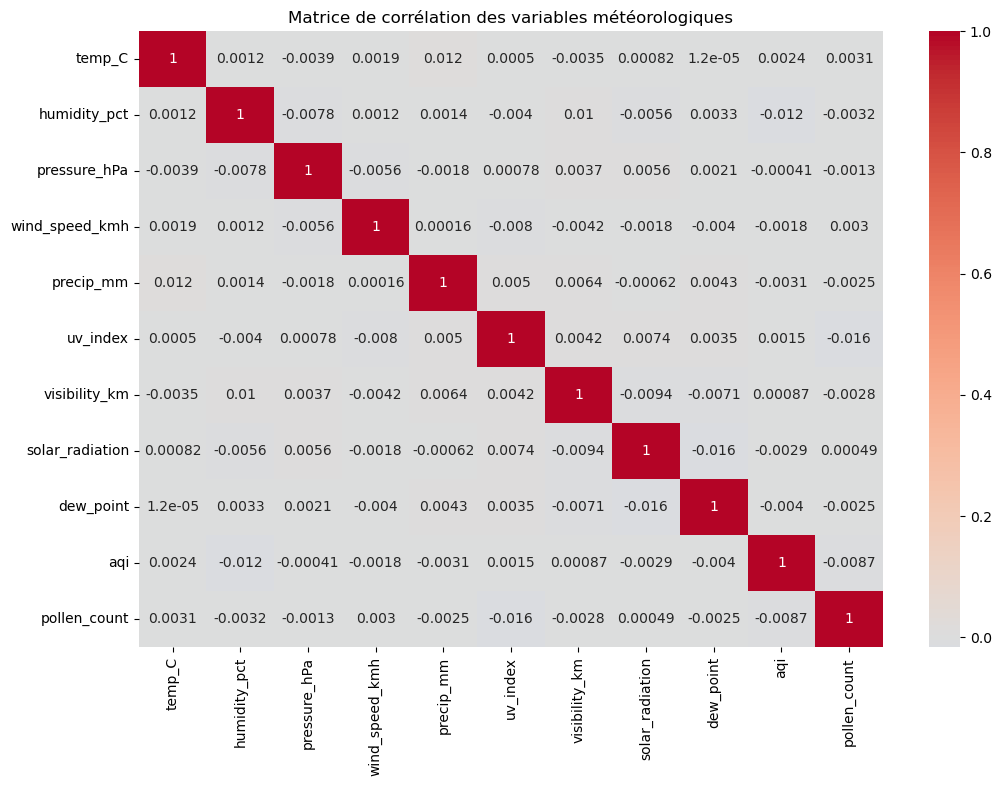

In [188]:
var_met = ['temp_C', 'humidity_pct', 'pressure_hPa', 'wind_speed_kmh', 'precip_mm', 'uv_index', 'visibility_km', 'solar_radiation', 'dew_point', 'aqi', 'pollen_count']

# Analyse des corrélations

corr_matrix3 = data_3clean[var_met].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation des variables météorologiques")
plt.show()

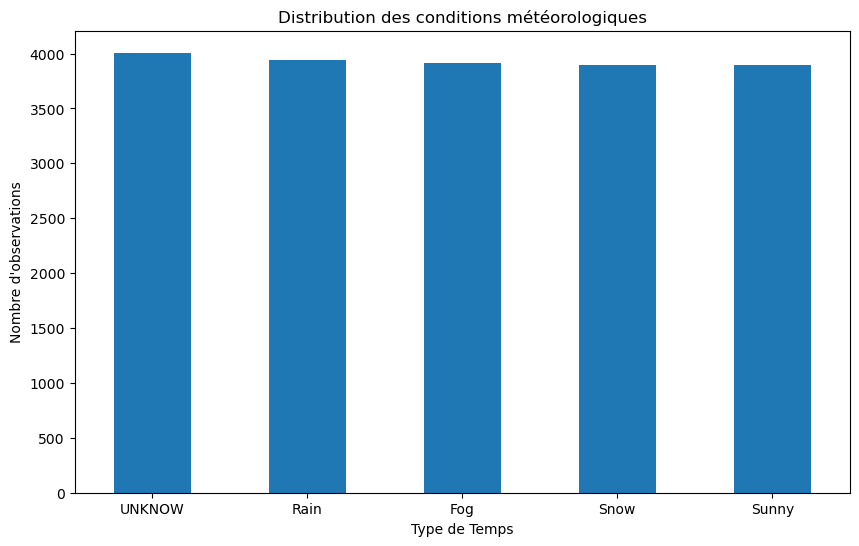

In [193]:
# Conditions météorologiques

plt.figure(figsize=(10, 6))
data_3clean['weather_code'].value_counts().plot(kind='bar')
plt.title("Distribution des conditions météorologiques")
plt.xlabel("Type de Temps")
plt.ylabel("Nombre d'observations")
plt.xticks(rotation=0)
plt.show()

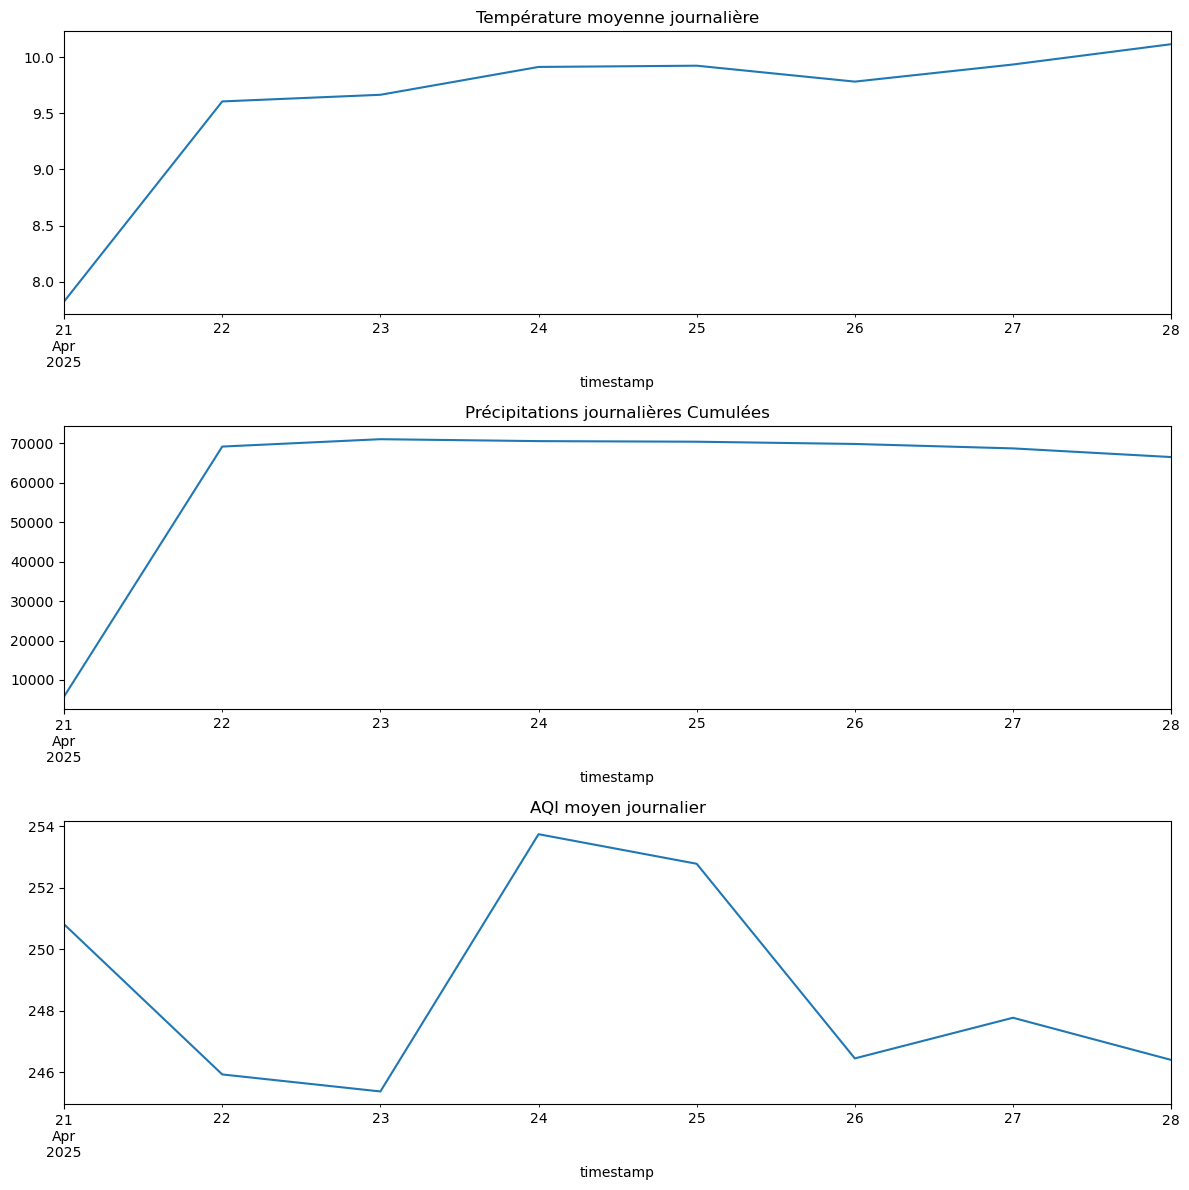

In [198]:
# Evolution temporelle des paramètres clés

data_3clean.set_index('timestamp', inplace=True)

fig, axes = plt.subplots(3, 1, figsize=(12, 12))
data_3clean['temp_C'].resample('D').mean().plot(ax=axes[0], title='Température moyenne journalière')
data_3clean['precip_mm'].resample('D').sum().plot(ax=axes[1], title='Précipitations journalières Cumulées')
data_3clean['aqi'].resample('D').mean().plot(ax=axes[2], title='AQI moyen journalier')
plt.tight_layout()
plt.show()

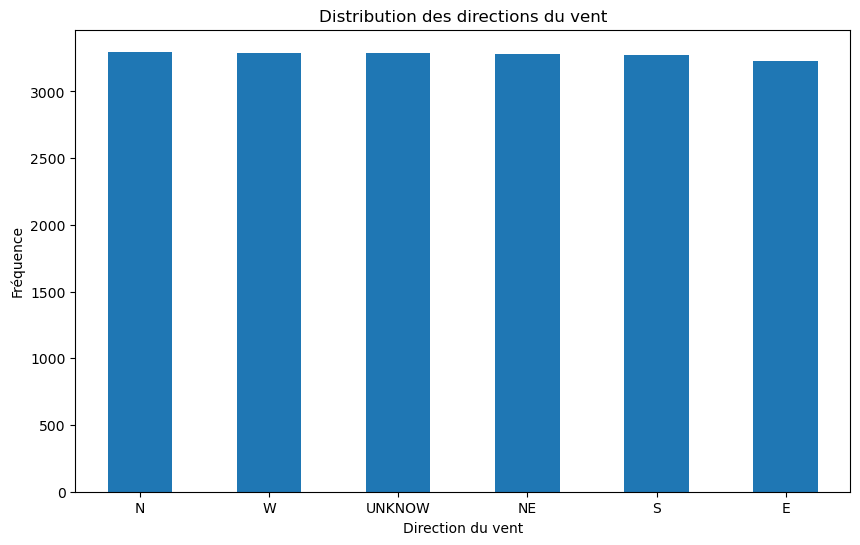

In [205]:
# Vents dominants

plt.figure(figsize=(10, 6))
data_3clean['wind_dir'].value_counts().plot(kind='bar')
plt.title("Distribution des directions du vent")
plt.xlabel("Direction du vent")
plt.ylabel("Fréquence")
plt.xticks(rotation=0)
plt.show()

# Data_4

### Question de recherche :
Quels sont les facteurs qui influencent l'engagement sur les posts des réseaux sociaux ?

### Importaton de la base

In [283]:
data_4 = pd.read_csv('Data_4.csv')

data_4.head()

PostID       Content  User#                    PostDate  Likes  Shares  \
0    1738        👍 Good  user2  2025-04-28T22:21:54.950405    NaN     9.0   
1    1819           NaN    NaN                  12-31-2022   97.0     NaN   
2    1965  <p>Hello</p>  user2  2025-04-28T22:21:54.950465    NaN    17.0   
3    1983       Error 🚫    NaN                  1670000000   47.0     NaN   
4    1286        👍 Good  User1                  12-31-2022    NaN     NaN   

         Tags Lang   Content_dup  ???  
0  #fun,#work   en        👍 Good  NaN  
1         NaN   fr           NaN  NaN  
2  #fun,#work   es  <p>Hello</p>  NaN  
3         NaN   fr       Error 🚫  NaN  
4         NaN   fr        👍 Good  NaN

### Nettoyage de la base

In [284]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PostID       3333 non-null   int64  
 1   Content      2450 non-null   object 
 2   User#        2249 non-null   object 
 3   PostDate     3333 non-null   object 
 4   Likes        1649 non-null   float64
 5   Shares       1718 non-null   float64
 6   Tags         1637 non-null   object 
 7   Lang         3333 non-null   object 
 8   Content_dup  2450 non-null   object 
 9   ???          0 non-null      float64
dtypes: float64(3), int64(1), object(6)
memory usage: 260.5+ KB


In [285]:
data_4 = data_4.rename({"User#" : "User"}, axis = 1)

In [286]:
data_4["PostID"] = data_4["PostID"].astype(str)

In [287]:
data_4["PostDate"] = data_4["PostDate"].apply(lambda x: "12-31-2022" if x == "1670000000" else x)

In [301]:
def convert_to_date(value):
    if pd.isna(value):
        return np.nan
    
    try:
        # Cas 1: Format ISO avec timestamp (ex: "2025-04-28T22:21:54.950405")
        if isinstance(value, str) and 'T' in value:
            return datetime.fromisoformat(value).date()
        
        # Cas 2: Format US (ex: "12-31-2022")
        elif isinstance(value, str) and '-' in value:
            return datetime.strptime(value, '%m-%d-%Y').date()
        
        else:
            return pd.to_datetime(value, errors='coerce')
            
    except (ValueError, TypeError):
        return np.nan

data_4['PostDate'] = data_4['PostDate'].apply(convert_to_date)

In [290]:
data_4['Tags'] = data_4['Tags'].str.replace(",", " ")

In [293]:
data_4['Lang'] = data_4['Lang'].str.upper()

In [296]:
data_4['User'] = data_4['User'].str.capitalize()

In [302]:
def clean_content(content):
    if pd.isna(content):
        return np.nan
    
    # 1. Supprimer les emojis et symboles spécifiques
    content = re.sub(r'[👍🚫]', '', str(content))
    
    # 2. Supprimer les balises HTML
    content = re.sub(r'<[^>]+>', '', content)
    
    # 3. Supprimer les espaces avant/après
    content = content.strip()
    
    # 4. Remplacer les multiples espaces par un seul
    content = re.sub(r'\s+', ' ', content)
    
    return content if content != '' else np.nan

# Application du nettoyage
data_4['Content'] = data_4['Content'].apply(clean_content)

In [308]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   PostID    3333 non-null   object        
 1   Content   2450 non-null   object        
 2   User      2249 non-null   object        
 3   PostDate  3333 non-null   datetime64[ns]
 4   Likes     1649 non-null   float64       
 5   Shares    1718 non-null   float64       
 6   Tags      1637 non-null   object        
 7   Lang      3333 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 208.4+ KB


In [305]:
data_4clean = data_4

In [306]:
data_4clean.drop(columns = ['???', 'Content_dup'], inplace = True)

In [309]:
data_4clean.isnull().sum()

PostID         0
Content      883
User        1084
PostDate       0
Likes       1684
Shares      1615
Tags        1696
Lang           0
dtype: int64

In [310]:
missing_val4 = data_4clean.isnull().mean() * 100

missing_val4

PostID       0.000000
Content     26.492649
User        32.523252
PostDate     0.000000
Likes       50.525053
Shares      48.454845
Tags        50.885089
Lang         0.000000
dtype: float64

In [317]:
data_4clean['Content'] = data_4clean['Content'].fillna('No Content')

In [318]:
data_4clean['User'] = data_4clean['User'].fillna('No User')

In [323]:
data_4['Tags'] = data_4['Tags'].fillna('No Tag')

In [324]:
num_var4 = ["Likes", "Shares"]
for var in num_var4:
    data_4clean[var] = data_4clean[var].fillna(data_4clean[var].median())

### Analyse de la base

In [329]:
data_4clean.describe()

Likes       Shares
count  3333.000000  3333.000000
mean     48.265527    25.164116
std      20.199723    10.597759
min       0.000000     0.000000
25%      48.000000    25.000000
50%      48.000000    25.000000
75%      48.000000    26.000000
max     100.000000    50.000000

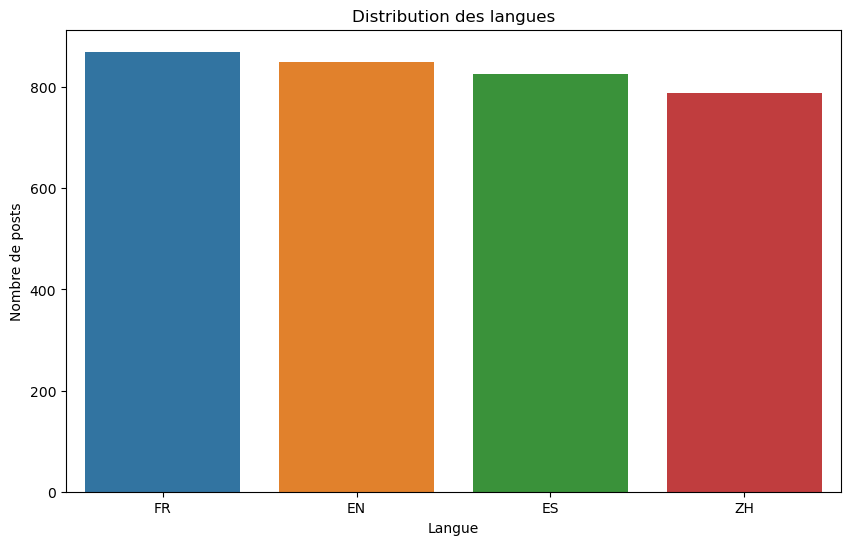

In [331]:
# Distribution des langues

plt.figure(figsize=(10, 6))
sns.countplot(data=data_4clean, x='Lang', order=data_4clean['Lang'].value_counts().index)
plt.title('Distribution des langues')
plt.xlabel('Langue')
plt.ylabel('Nombre de posts')
plt.xticks(rotation=0)
plt.show()

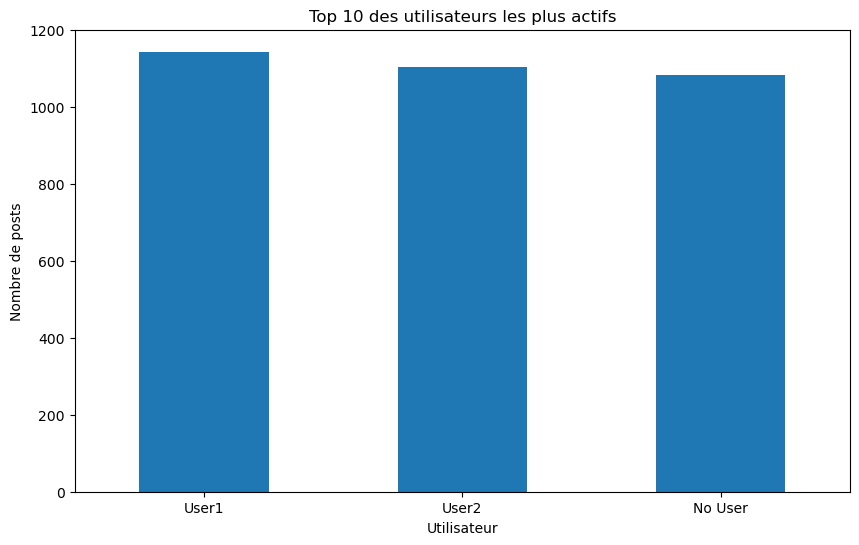

In [332]:
# Top utilisateurs

top_users = data_4clean['User'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar')
plt.title('Top 10 des utilisateurs les plus actifs')
plt.xlabel('Utilisateur')
plt.ylabel('Nombre de posts')
plt.xticks(rotation=0)
plt.show()

In [334]:
# Analyse des tags

all_tags = [tag for sublist in data_4clean['Tags'].dropna().str.split(',') for tag in sublist]
tag_counts = Counter(all_tags)
top_tags = pd.DataFrame(tag_counts.most_common(10), columns=['Tag', 'Count'])

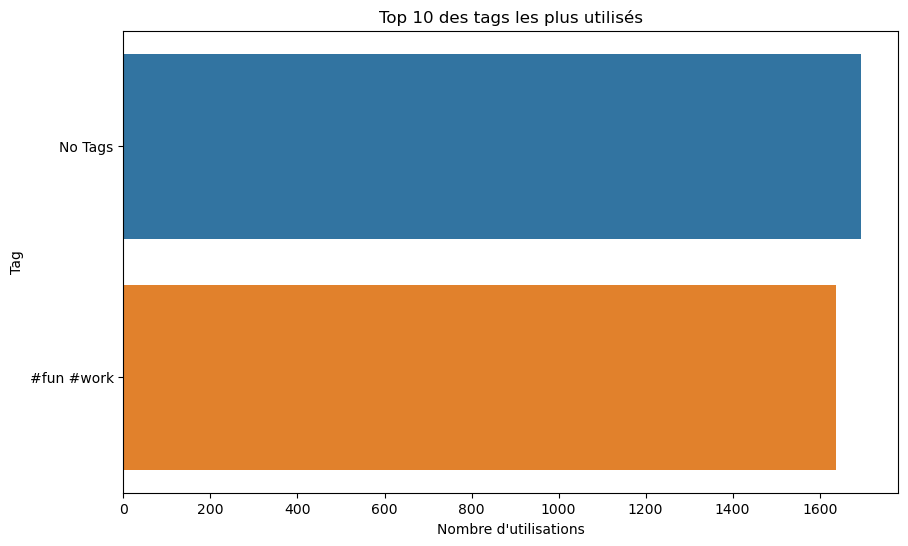

In [338]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_tags, x='Count', y='Tag')
plt.title('Top 10 des tags les plus utilisés')
plt.xlabel('Nombre d\'utilisations')
plt.ylabel('Tag')
plt.show()

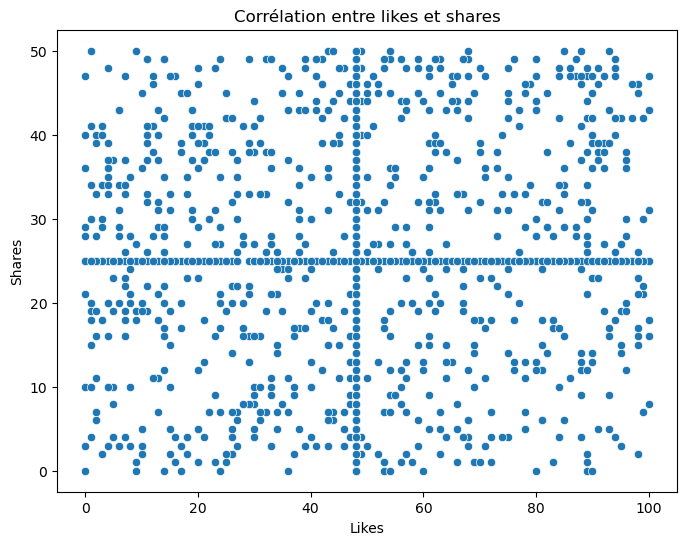

In [340]:
# Corrélation entre likes et shares

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_4clean, x='Likes', y='Shares')
plt.title('Corrélation entre likes et shares')
plt.show()

In [341]:
# Créer des indicateurs pour les tags principaux

data_4clean['Has_Fun_Tag'] = data_4clean['Tags'].str.contains('#fun', na=False)
data_4clean['Has_Work_Tag'] = data_4clean['Tags'].str.contains('#work', na=False)

      Avg_Likes  Avg_Shares  Count
Lang                              
ES    48.826667   25.153939    825
EN    48.612941   25.294118    850
FR    47.866667   25.079310    870
ZH    47.743655   25.128173    788


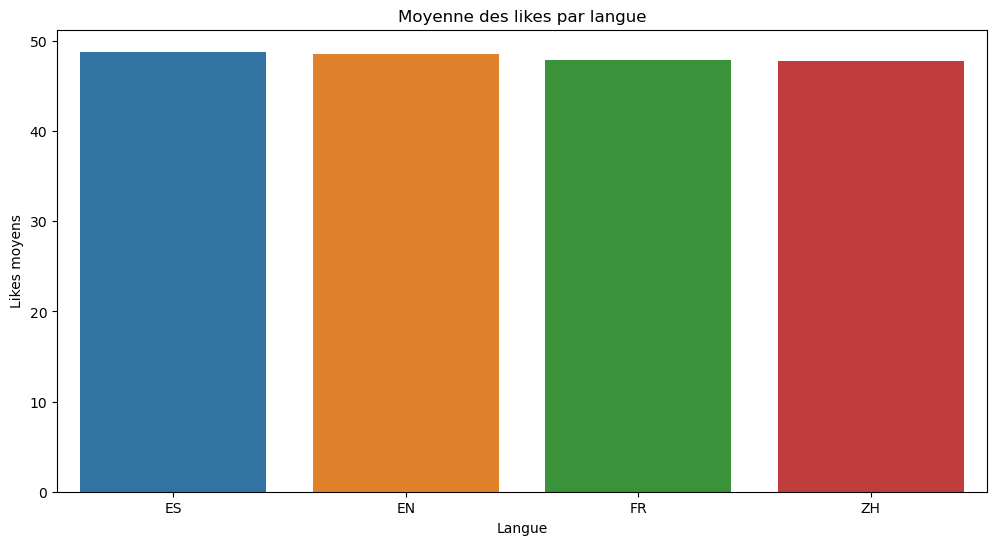

In [347]:
# Engagement moyen par langue

engagement_by_lang = data_4clean.groupby('Lang').agg(
    Avg_Likes=('Likes', 'mean'),
    Avg_Shares=('Shares', 'mean'),
    Count=('PostID', 'count')
).sort_values('Avg_Likes', ascending=False)

print(engagement_by_lang)

plt.figure(figsize=(12, 6))
sns.barplot(data=engagement_by_lang.reset_index(), x='Lang', y='Avg_Likes')
plt.title('Moyenne des likes par langue')
plt.xlabel('Langue')
plt.ylabel('Likes moyens')
plt.xticks(rotation=0)
plt.show()

# Data_5

### Question de recherche : 
Comment les différents paramètres environnementaux (température, humidité, pression) et techniques (batterie, signal) influencent-ils le statut des appareils IoT et leur probabilité de générer des alertes?

### Importation de la base

In [386]:
data_5 = pd.read_csv('Data_5.csv')

data_5clean.head()

deviceID           timestamp  temperature_C  humidity_pct  pressure_hPa  \
0   DEV130 2025-04-28 12:00:00          47.77          84.8        988.72   
1   DEV175 2025-04-27 23:00:00         -20.74          17.5        987.33   
2   DEV169 2025-04-28 19:00:00         -16.37           9.0       1007.35   
3   DEV116 2025-04-28 02:00:00          36.79          39.5        969.20   
4   DEV147 2025-04-28 21:00:00          35.30          64.7        988.35   

   battery_V  signal_dBm   status  location_lat  location_long  \
0       2.80         -38       OK      6.291440       2.481693   
1       2.05        -116  MISSING      6.381750       2.329651   
2       4.20         -66     WARN      6.229935       2.477309   
3       3.00         -30  MISSING      6.397411       2.482229   
4       4.34         -93       OK      6.208830       2.554316   

  firmware_version  uptime_hours      error_codes            metrics_json  \
0             v3.0          2755               []  {'cpu': 43, 'mem': 71}   
1             v2.3          5310  [100, 174, 148]  {'cpu': 41, 'mem': 35}   
2             v3.5          8408       [190, 180]  {'cpu': 59, 'mem': 30}   
3             v3.7          6392               []   {'cpu': 2, 'mem': 38}   
4             v3.2          9914               []   {'cpu': 2, 'mem': 14}   

   reading_count last_calibration calibration_values  \
0            433       2024-10-14     0.48,0.82,0.82   
1            347       2025-02-17     0.93,0.47,0.98   
2            450       2024-11-07     0.39,0.39,0.96   
3            468       2024-08-27       0.5,0.98,0.5   
4            226       2024-08-01     0.56,0.75,0.77   

                 contact_info  is_active  alert_count  
0   device5@iot.com 664394506       True            8  
1  device60@iot.com 606055897       True           15  
2  device33@iot.com 679113853       True           11  
3  device46@iot.com 692810538      False            0  
4  device20@iot.com 670155088      False           15

### Nettoyage de la base

In [364]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78412 entries, 0 to 78411
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   deviceID            78412 non-null  object 
 1   timestamp           78412 non-null  object 
 2   temperature_C       78412 non-null  float64
 3   humidity_pct        78412 non-null  float64
 4   pressure_hPa        78412 non-null  float64
 5   battery_V           78412 non-null  float64
 6   signal_dBm          78412 non-null  int64  
 7   status              58731 non-null  object 
 8   location_lat        78412 non-null  float64
 9   location_long       78412 non-null  float64
 10  firmware_version    78412 non-null  object 
 11  uptime_hours        78412 non-null  int64  
 12  error_codes         78412 non-null  object 
 13  metrics_json        78412 non-null  object 
 14  reading_count       78412 non-null  int64  
 15  last_calibration    78412 non-null  object 
 16  cali

In [365]:
data_5["timestamp"] = pd.to_datetime(data_5["timestamp"].str[:13])

In [366]:
data_5["contact_info"] = data_5["contact_info"].str.replace(r'[#;_]', ' ', regex=True)

In [368]:
data_5["last_calibration"] = data_5["last_calibration"].astype(str)
# data_5["last_calibration"] = data_5["last_calibration"].replace('nan', pd.NaT)
data_5["last_calibration"] = pd.to_datetime(data_5["last_calibration"], format='%Y-%m-%d', errors='coerce')

In [370]:
data_5.isnull().sum()

deviceID                  0
timestamp                 0
temperature_C             0
humidity_pct              0
pressure_hPa              0
battery_V                 0
signal_dBm                0
status                19681
location_lat              0
location_long             0
firmware_version          0
uptime_hours              0
error_codes               0
metrics_json              0
reading_count             0
last_calibration          0
calibration_values        0
contact_info              0
is_active                 0
alert_count               0
dtype: int64

In [371]:
miss_val5 = data_5.isnull().mean() * 100

miss_val5

deviceID               0.000000
timestamp              0.000000
temperature_C          0.000000
humidity_pct           0.000000
pressure_hPa           0.000000
battery_V              0.000000
signal_dBm             0.000000
status                25.099475
location_lat           0.000000
location_long          0.000000
firmware_version       0.000000
uptime_hours           0.000000
error_codes            0.000000
metrics_json           0.000000
reading_count          0.000000
last_calibration       0.000000
calibration_values     0.000000
contact_info           0.000000
is_active              0.000000
alert_count            0.000000
dtype: float64

In [375]:
data_5["status"].value_counts()

WARN       19738
MISSING    19681
OK         19530
FAIL       19463
Name: status, dtype: int64

In [373]:
data_5clean = data_5

In [374]:
data_5clean['status'] = data_5clean['status'].astype('category')

data_5clean['status'] = data_5clean['status'].cat.add_categories('MISSING').fillna('MISSING')

In [376]:
data_5clean.duplicated().sum()

0

In [388]:
data_5clean["error_codes"].value_counts()

[]                 39284
[175]                159
[176]                154
[171]                152
[185]                151
                   ...  
[174, 171]             1
[185, 195, 129]        1
[105, 142]             1
[100, 103, 180]        1
[184, 121, 181]        1
Name: error_codes, Length: 20335, dtype: int64

In [389]:
data_5clean.drop(columns= ['error_codes'], inplace = True)

In [390]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78412 entries, 0 to 78411
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   deviceID            78412 non-null  object 
 1   timestamp           78412 non-null  object 
 2   temperature_C       78412 non-null  float64
 3   humidity_pct        78412 non-null  float64
 4   pressure_hPa        78412 non-null  float64
 5   battery_V           78412 non-null  float64
 6   signal_dBm          78412 non-null  int64  
 7   status              58731 non-null  object 
 8   location_lat        78412 non-null  float64
 9   location_long       78412 non-null  float64
 10  firmware_version    78412 non-null  object 
 11  uptime_hours        78412 non-null  int64  
 12  error_codes         78412 non-null  object 
 13  metrics_json        78412 non-null  object 
 14  reading_count       78412 non-null  int64  
 15  last_calibration    78412 non-null  object 
 16  cali

### Analyse de la base

In [378]:
data_5clean.describe()

temperature_C  humidity_pct  pressure_hPa     battery_V    signal_dBm  \
count   78412.000000   78412.00000  78412.000000  78412.000000  78412.000000   
mean       24.883234      50.19894   1000.073182      3.501239    -75.102943   
std        31.853000      28.85091     28.851215      0.865926     26.274574   
min       -30.000000       0.00000    950.000000      2.000000   -120.000000   
25%        -2.740000      25.30000    975.070000      2.750000    -98.000000   
50%        24.740000      50.20000   1000.240000      3.500000    -75.000000   
75%        52.562500      75.30000   1024.980000      4.250000    -52.000000   
max        80.000000     100.00000   1050.000000      5.000000    -30.000000   

       location_lat  location_long  uptime_hours  reading_count   alert_count  
count  78412.000000   78412.000000  78412.000000   78412.000000  78412.000000  
mean       6.349849       2.449858   5008.617138     250.111105      9.987770  
std        0.086525       0.086829   2890.861826     144.294177      6.069563  
min        6.200001       2.300011      0.000000       1.000000      0.000000  
25%        6.275338       2.374534   2506.000000     125.000000      5.000000  
50%        6.349387       2.449550   5016.000000     250.000000     10.000000  
75%        6.425033       2.525597   7527.000000     375.000000     15.000000  
max        6.499997       2.599998  10000.000000     500.000000     20.000000

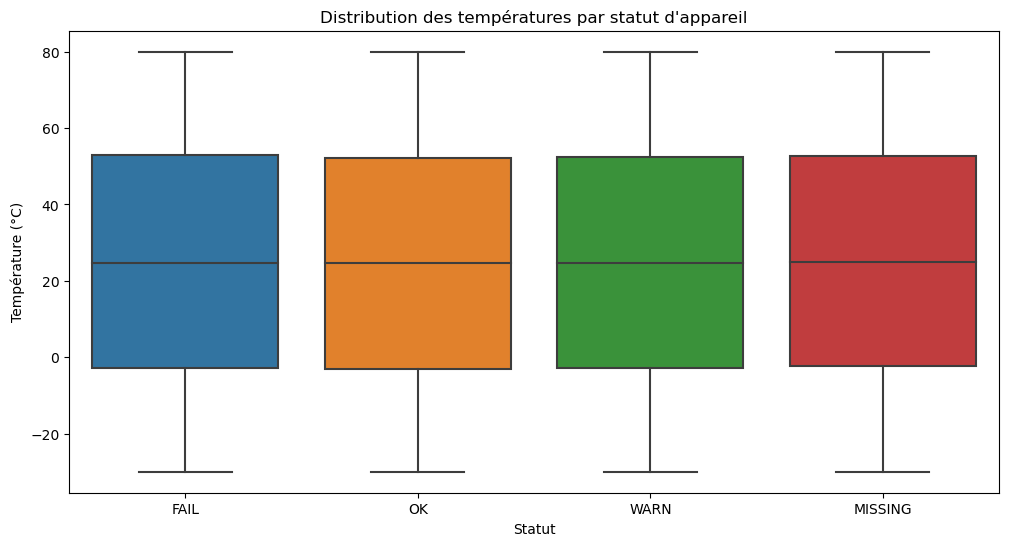

In [379]:
# Relation entre température et statut des appareils

plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='temperature_C', data=data_5clean)
plt.title('Distribution des températures par statut d\'appareil')
plt.xlabel('Statut')
plt.ylabel('Température (°C)')
plt.show()

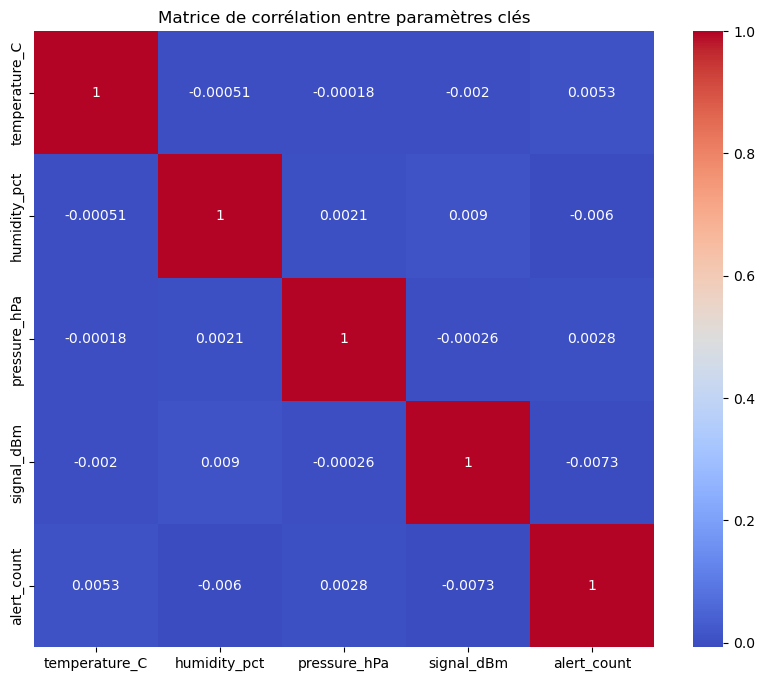

In [381]:
# Corrélation matrice

corr_matrix = data_5clean[['temperature_C', 'humidity_pct', 'pressure_hPa', 'signal_dBm', 'alert_count']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre paramètres clés')
plt.show()

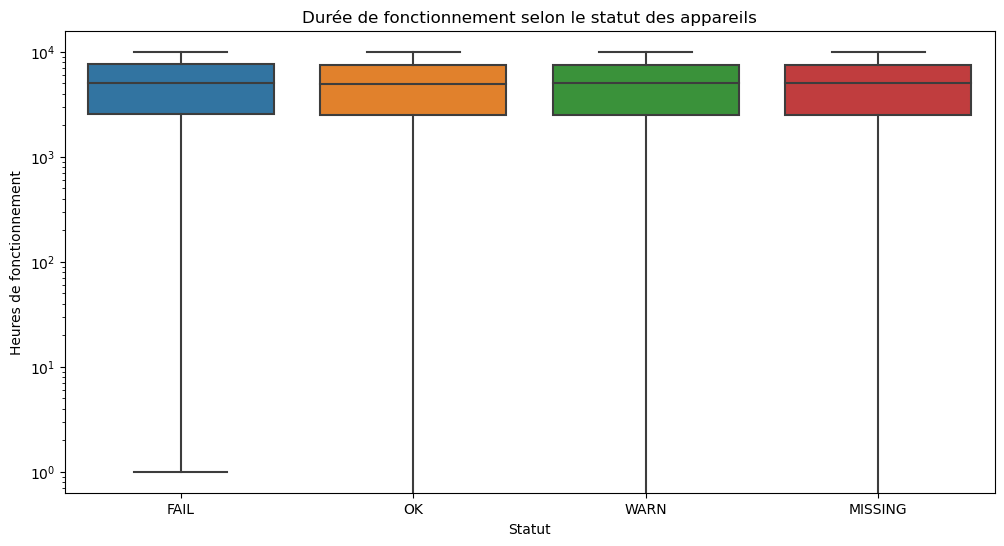

In [393]:
# Relation entre uptime_hours et statut

plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='uptime_hours', data=data_5clean)
plt.title('Durée de fonctionnement selon le statut des appareils')
plt.xlabel('Statut')
plt.ylabel('Heures de fonctionnement')
plt.yscale('log')
plt.show()

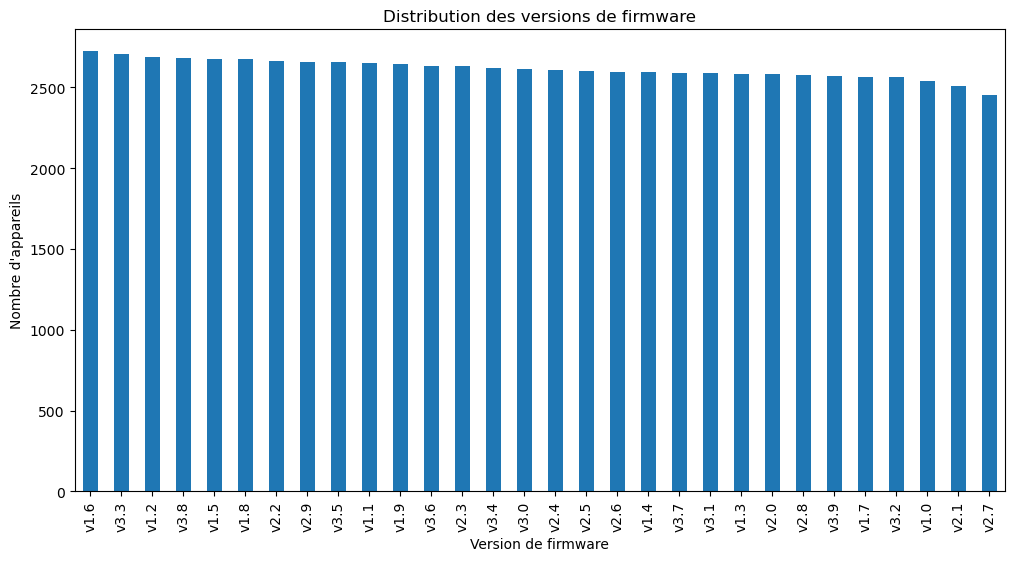

In [394]:
# Distribution des firmware versions

plt.figure(figsize=(12, 6))
data_5clean['firmware_version'].value_counts().plot(kind='bar')
plt.title('Distribution des versions de firmware')
plt.xlabel('Version de firmware')
plt.ylabel('Nombre d\'appareils')
plt.show()

C:\Users\Orcklyx O. Y. ANATO\AppData\Local\Temp\ipykernel_18172\1928259086.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  data_5clean['last_cal'] = (pd.to_datetime('now') - data_5clean['last_calibration']).dt.days


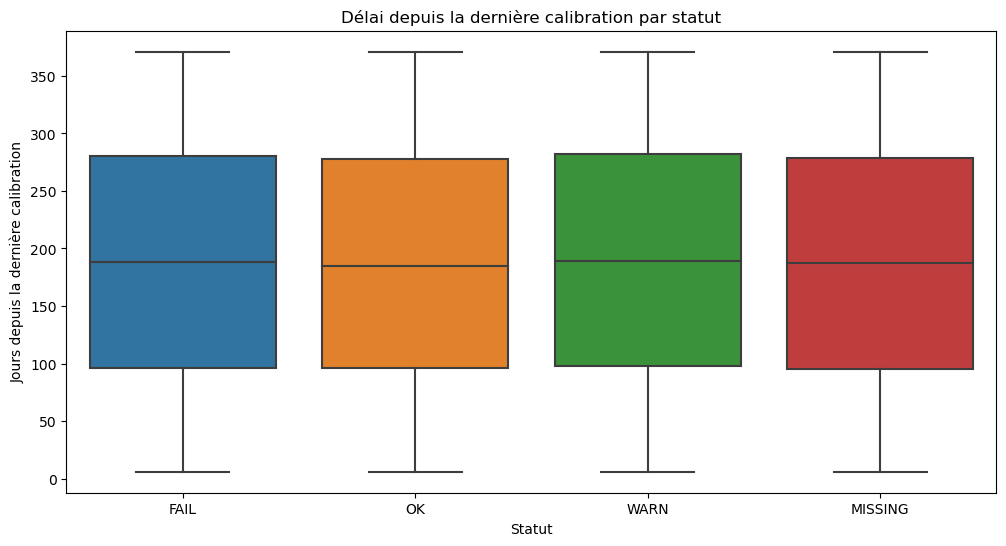

In [396]:
# Dernière calibration par statut

data_5clean['last_cal'] = (pd.to_datetime('now') - data_5clean['last_calibration']).dt.days

plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='last_cal', data=data_5clean)
plt.title('Délai depuis la dernière calibration par statut')
plt.xlabel('Statut')
plt.ylabel('Jours depuis la dernière calibration')
plt.show()

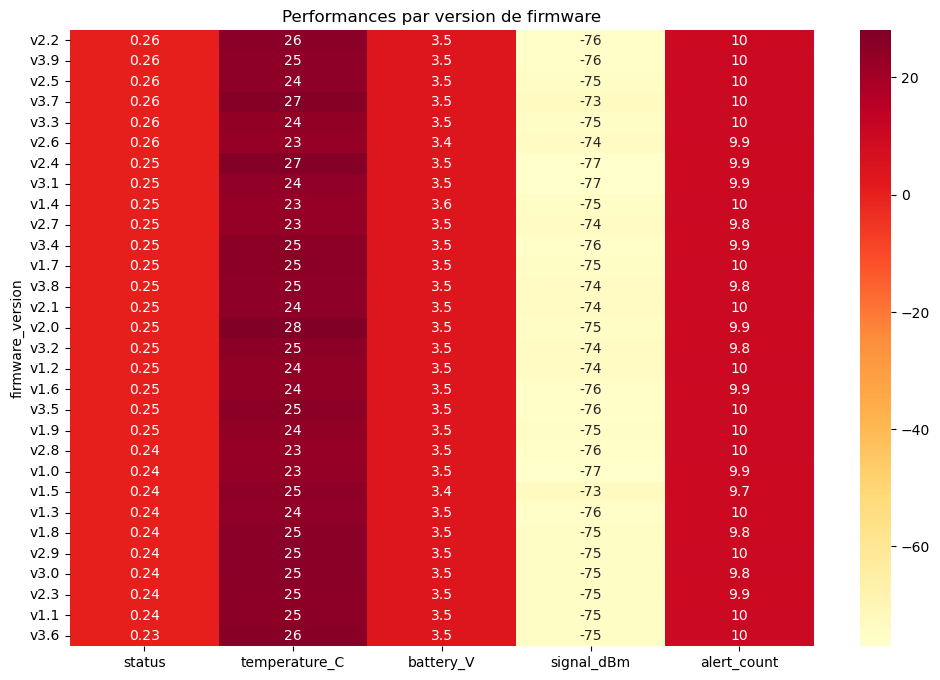

In [399]:
# Performance des différentes versions de firmware

firmware_stats = data_5clean.groupby('firmware_version').agg({
    'status': lambda x: (x == 'FAIL').mean(),
    'temperature_C': 'median',
    'battery_V': 'median',
    'signal_dBm': 'median',
    'alert_count': 'mean'
}).sort_values('status', ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(firmware_stats, annot=True, cmap='YlOrRd')
plt.title('Performances par version de firmware')
plt.show()

# Data_6

### QR: 


### Importation de la base

In [419]:
data_6 = pd.read_csv('Data_6.csv')

data_6.head()

post_id user_id                   timestamp    content_text  likes  \
0  POST1000    U133  2025-02-05 04:41:29.419875               👍    923   
1  POST1001    U149            18/02/2025 05:36               👍    786   
2  POST1002    U351            17/02/2025 14:35               👍    542   
3  POST1003    U466            28/02/2025 18:30             NaN    767   
4  POST1004    U351  2025-02-01 17:27:15.419875  Great product!    881   

   comments  shares          hashtags   mentions  sentiment_score language  \
0       248       5               NaN        NaN             0.26       fr   
1       228     111  #fun,#sale,#tech  U145,U391             0.98      NaN   
2       294      58        #sale,#fun        U88            -0.05       en   
3       283     141             #news        NaN            -0.23       en   
4       273      75               NaN  U450,U134             0.44      NaN   

  platform device_type                 geo              url  is_promoted  \
0      web     desktop    -6.4138,137.4846  http://link.com        False   
1      web      tablet  -58.4271,-171.8228              NaN        False   
2      NaN      mobile    -5.6335,-29.4963  http://link.com         True   
3  android      mobile     14.0612,86.6917              NaN        False   
4      NaN      mobile    -78.0114,95.4821  http://link.com        False   

   reach  impressions    ctr  ad_cost  
0   1477          324  0.297    14.08  
1   4135         1670  0.159    88.96  
2      6         3754  0.223    63.07  
3   2174         2644  0.833    74.24  
4   3547         1559  0.466    37.58

### Nettoyage de la base

In [420]:
data_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          8880 non-null   object 
 1   user_id          8880 non-null   object 
 2   timestamp        8880 non-null   object 
 3   content_text     6651 non-null   object 
 4   likes            8880 non-null   int64  
 5   comments         8880 non-null   int64  
 6   shares           8880 non-null   int64  
 7   hashtags         6693 non-null   object 
 8   mentions         5939 non-null   object 
 9   sentiment_score  8880 non-null   float64
 10  language         6642 non-null   object 
 11  platform         6597 non-null   object 
 12  device_type      8880 non-null   object 
 13  geo              8880 non-null   object 
 14  url              4393 non-null   object 
 15  is_promoted      8880 non-null   bool   
 16  reach            8880 non-null   int64  
 17  impressions   

In [421]:
data_6["timestamp"].value_counts()

31/01/2025 13:29              2
13/03/2025 18:21              2
17/02/2025 06:02              2
21/02/2025 14:51              2
18/02/2025 08:14              2
                             ..
01/03/2025 04:56              1
2025-04-14 09:56:22.419875    1
2025-03-19 21:56:34.419875    1
2025-04-07 00:39:29.419875    1
07/02/2025 01:48              1
Name: timestamp, Length: 8801, dtype: int64

In [422]:
data_6["timestamp"] = data_6["timestamp"].str.replace('/', '-')

In [423]:
data_6["timestamp"] = pd.to_datetime(data_6["timestamp"].str[:13])

In [438]:
data_6["content_text"].value_counts()

Great product    4427
None             2229
Not satisfied    2224
Name: content_text, dtype: int64

In [425]:
data_6["content_text"] = data_6["content_text"].str.replace('!', '').str.replace('👍', 'Great product')

In [426]:
data_6["hashtags"] = data_6["hashtags"].str.replace(',', ' ')

In [427]:
data_6["language"] = data_6["language"].str.upper()

In [428]:
data_6["platform"] = data_6["platform"].str.capitalize()

data_6["device_type"] = data_6["device_type"].str.capitalize()

In [430]:
data_6.isnull().sum()

post_id               0
user_id               0
timestamp             0
content_text       2229
likes                 0
comments              0
shares                0
hashtags           2187
mentions           2941
sentiment_score       0
language           2238
platform           2283
device_type           0
geo                   0
url                4487
is_promoted           0
reach                 0
impressions           0
ctr                   0
ad_cost               0
dtype: int64

In [431]:
mv = data_6.isnull().mean() * 100

mv

post_id             0.000000
user_id             0.000000
timestamp           0.000000
content_text       25.101351
likes               0.000000
comments            0.000000
shares              0.000000
hashtags           24.628378
mentions           33.119369
sentiment_score     0.000000
language           25.202703
platform           25.709459
device_type         0.000000
geo                 0.000000
url                50.529279
is_promoted         0.000000
reach               0.000000
impressions         0.000000
ctr                 0.000000
ad_cost             0.000000
dtype: float64

In [432]:
data_6.drop(columns = 'url', inplace = True)

In [437]:
data_6["content_text"] = data_6["content_text"].fillna('None')

In [439]:
data_6["hashtags"] = data_6["hashtags"].fillna('No Tag')

In [442]:
data_6["mentions"] = data_6["mentions"].fillna('None')

In [440]:
data_6["language"] = data_6["language"].fillna('None')

In [441]:
data_6["platform"] = data_6["platform"].fillna('None')

In [446]:
data_6clean = data_6

data_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   post_id          8880 non-null   object        
 1   user_id          8880 non-null   object        
 2   timestamp        8880 non-null   datetime64[ns]
 3   content_text     8880 non-null   object        
 4   likes            8880 non-null   int64         
 5   comments         8880 non-null   int64         
 6   shares           8880 non-null   int64         
 7   hashtags         8880 non-null   object        
 8   mentions         8880 non-null   object        
 9   sentiment_score  8880 non-null   float64       
 10  language         8880 non-null   object        
 11  platform         8880 non-null   object        
 12  device_type      8880 non-null   object        
 13  geo              8880 non-null   object        
 14  is_promoted      8880 non-null   bool   

### Analyse de la base

In [444]:
data_6.describe()

likes     comments       shares  sentiment_score        reach  \
count  8880.000000  8880.000000  8880.000000      8880.000000  8880.000000   
mean    501.018356   150.680293   100.517455        -0.010446  2501.053266   
std     287.899333    87.310587    57.697487         0.579095  1452.164649   
min       0.000000     0.000000     0.000000        -1.000000     0.000000   
25%     249.000000    76.000000    51.000000        -0.510000  1223.750000   
50%     501.000000   151.000000   100.000000        -0.020000  2492.000000   
75%     752.000000   227.000000   150.000000         0.490000  3759.250000   
max    1000.000000   300.000000   200.000000         1.000000  5000.000000   

        impressions          ctr      ad_cost  
count   8880.000000  8880.000000  8880.000000  
mean    4990.701802     0.501702    50.372173  
std     2883.311815     0.288817    28.602114  
min        0.000000     0.000000     0.000000  
25%     2523.750000     0.253000    25.697500  
50%     4983.000000     0.502000    50.780000  
75%     7479.000000     0.752000    75.122500  
max    10000.000000     1.000000    99.990000

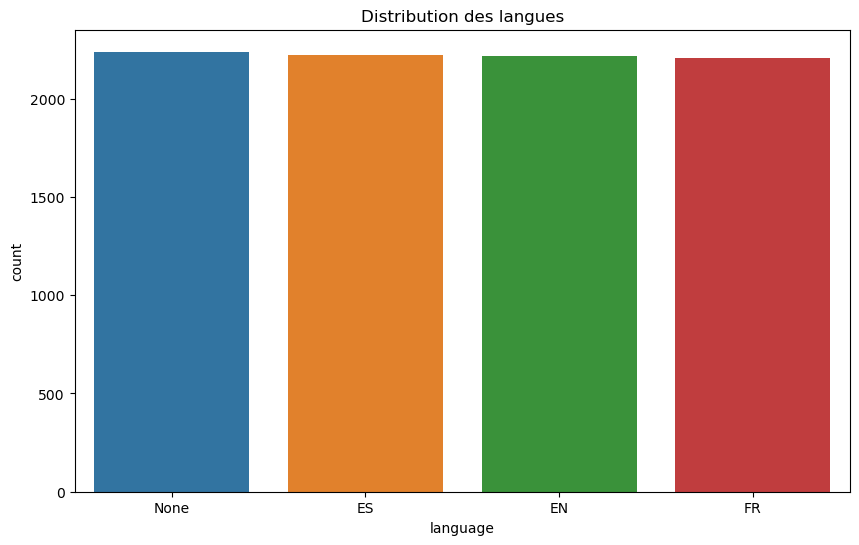

In [449]:
# Distribution des langues

plt.figure(figsize=(10, 6))
sns.countplot(data=data_6clean, x='language', order=data_6clean['language'].value_counts().index)
plt.title('Distribution des langues')
plt.xticks(rotation=0)
plt.show()

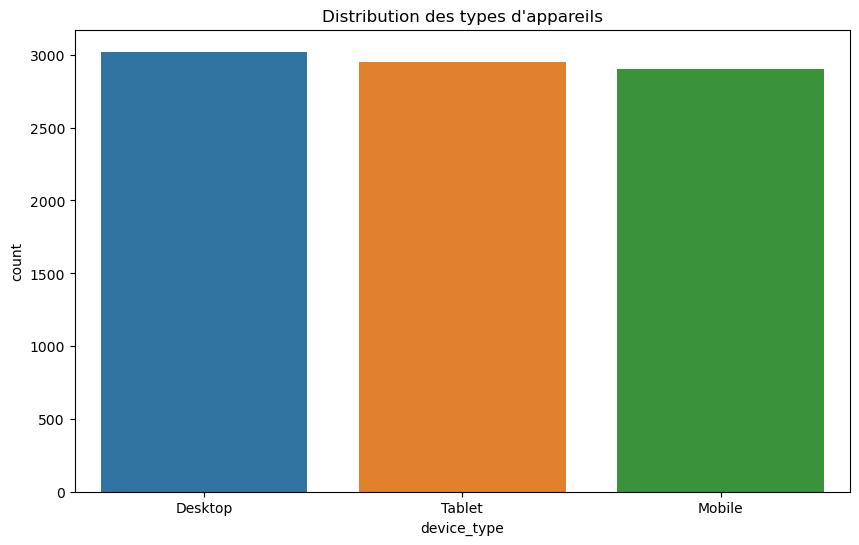

In [451]:
# Distribution des appareils

plt.figure(figsize=(10, 6))
sns.countplot(data=data_6clean, x='device_type', order=data_6clean['device_type'].value_counts().index)
plt.title('Distribution des types d\'appareils')
plt.xticks(rotation=0)
plt.show()

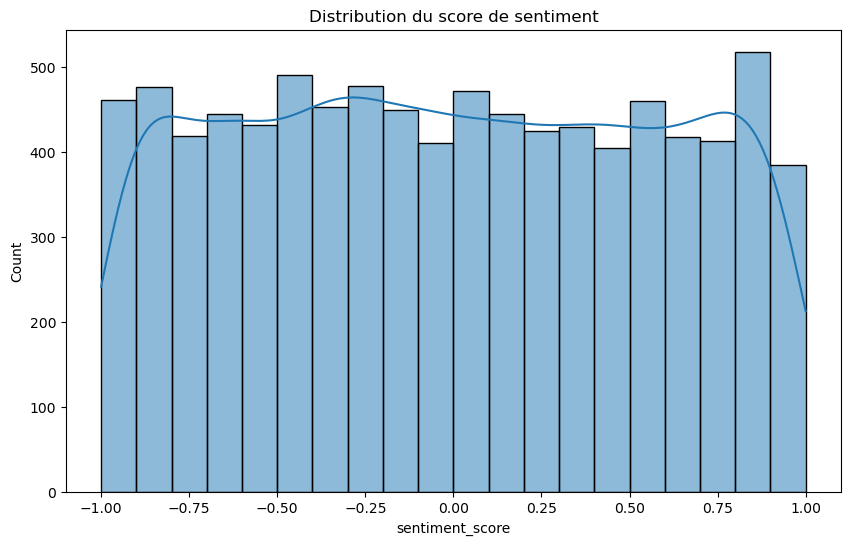

In [452]:
# Distribution du sentiment

plt.figure(figsize=(10, 6))
sns.histplot(data=data_6clean, x='sentiment_score', bins=20, kde=True)
plt.title('Distribution du score de sentiment')
plt.show()

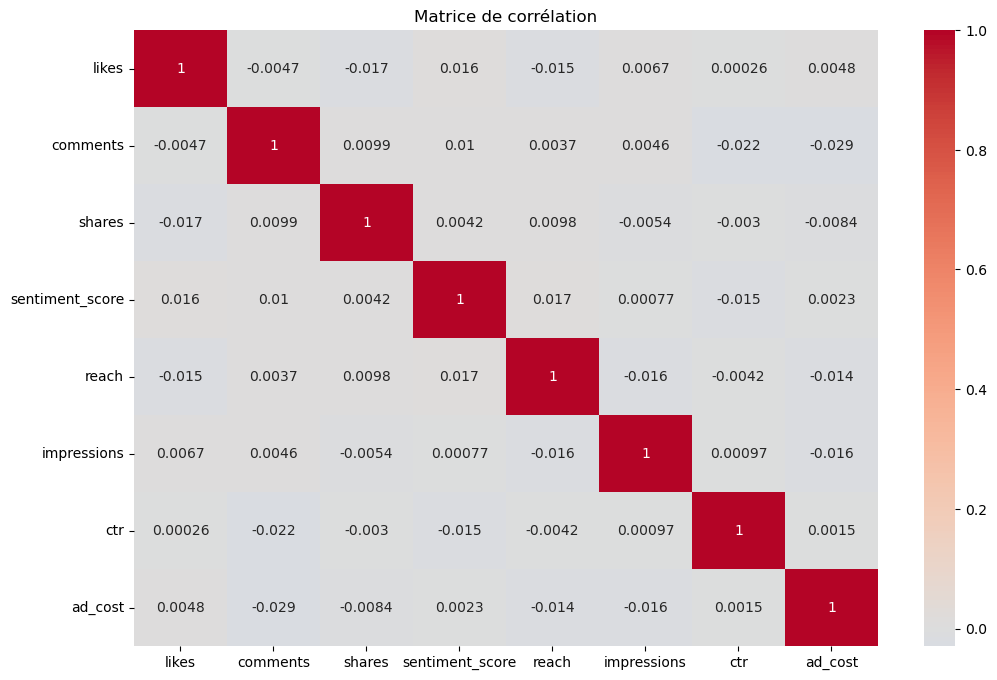

In [453]:
# Corrélations entre variables numériques

plt.figure(figsize=(12, 8))
corr_matrix = data_6clean[['likes', 'comments', 'shares', 'sentiment_score', 'reach', 'impressions', 'ctr', 'ad_cost']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()

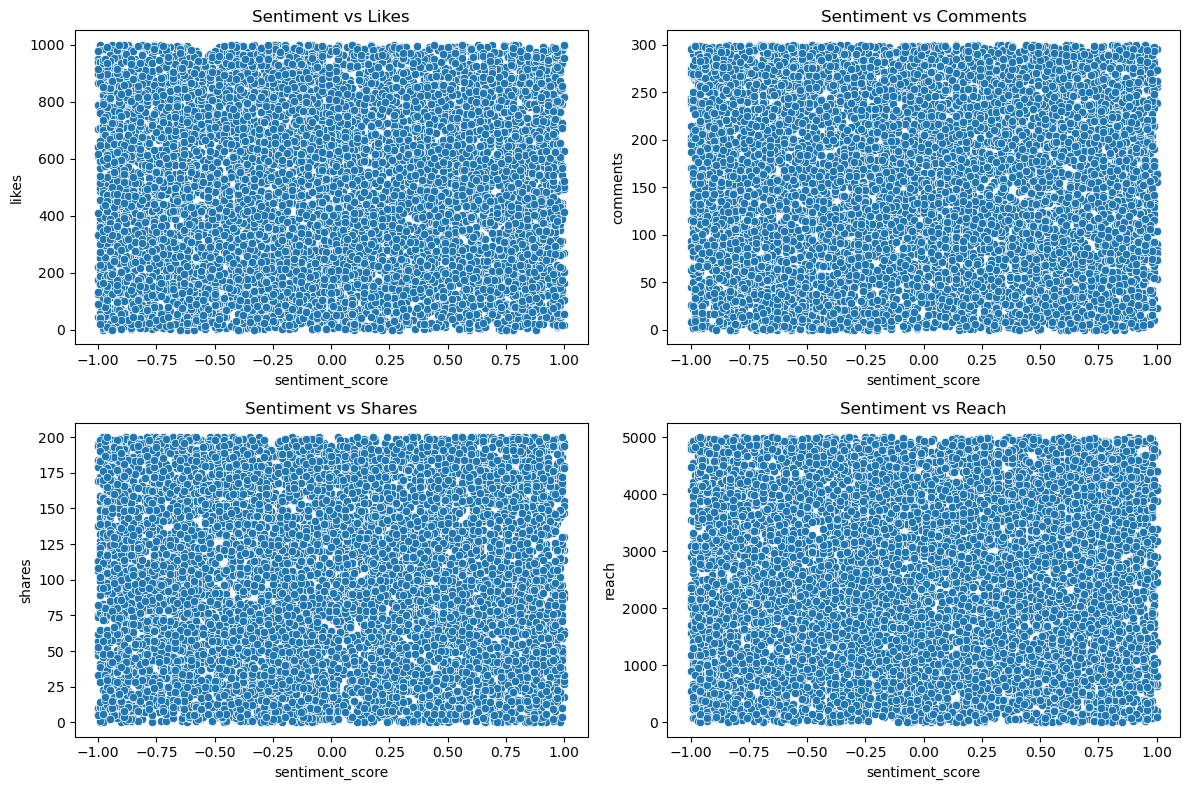

In [454]:
# Relation entre sentiment et engagement

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(data=data_6clean, x='sentiment_score', y='likes')
plt.title('Sentiment vs Likes')

plt.subplot(2, 2, 2)
sns.scatterplot(data=data_6clean, x='sentiment_score', y='comments')
plt.title('Sentiment vs Comments')

plt.subplot(2, 2, 3)
sns.scatterplot(data=data_6clean, x='sentiment_score', y='shares')
plt.title('Sentiment vs Shares')

plt.subplot(2, 2, 4)
sns.scatterplot(data=data_6clean, x='sentiment_score', y='reach')
plt.title('Sentiment vs Reach')

plt.tight_layout()
plt.show()

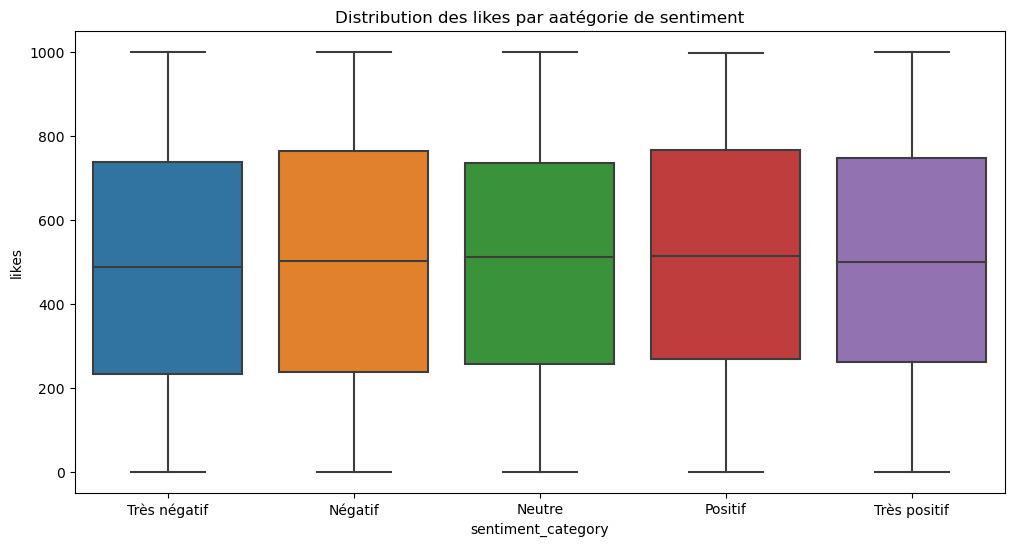

In [456]:
# Analyse par catégorie de sentiment

data_6clean['sentiment_category'] = pd.cut(data_6clean['sentiment_score'], 
                                       bins=[-1, -0.5, -0.1, 0.1, 0.5, 1],
                                       labels=['Très négatif', 'Négatif', 'Neutre', 'Positif', 'Très positif'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_6clean, x='sentiment_category', y='likes')
plt.title('Distribution des likes par aatégorie de sentiment')
plt.xticks(rotation=0)
plt.show()

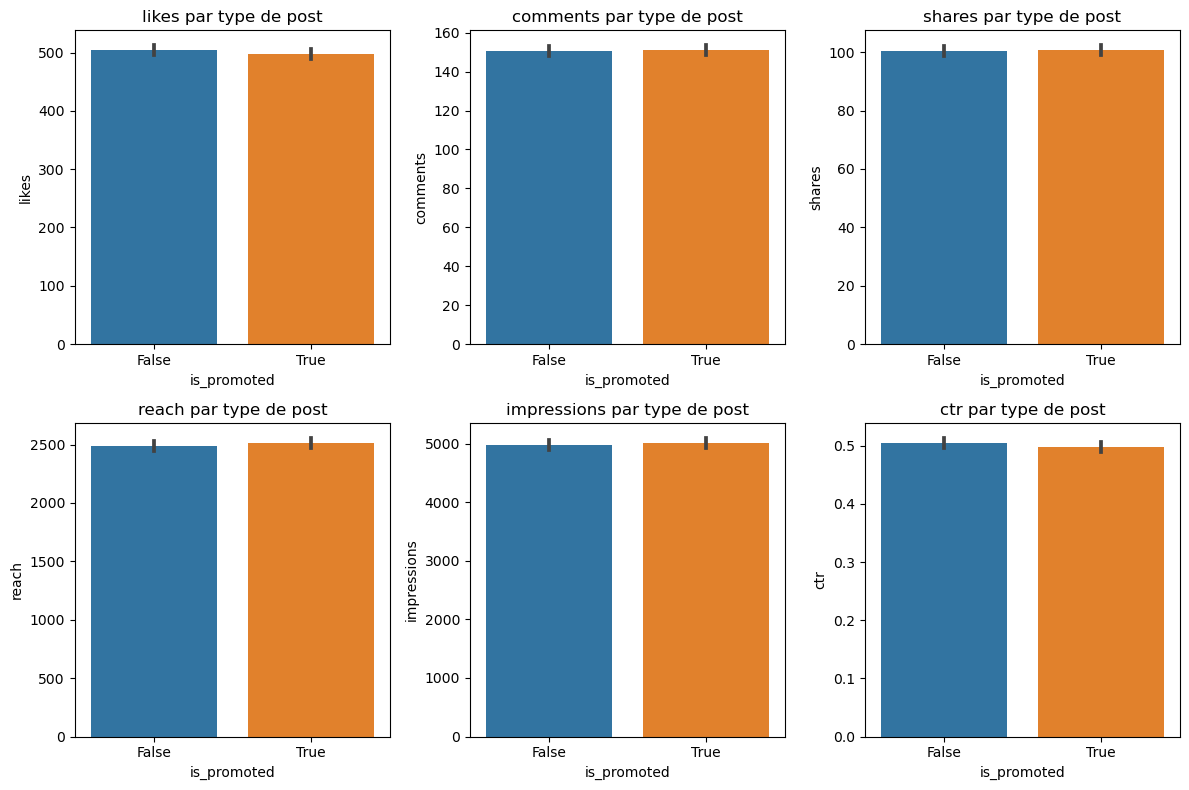

In [457]:
# Comparaison des posts promus vs non promus

promo_stats = data_6clean.groupby('is_promoted')[['likes', 'comments', 'shares', 'reach', 'impressions', 'ctr', 'ad_cost']].mean()

plt.figure(figsize=(12, 8))
for i, col in enumerate(['likes', 'comments', 'shares', 'reach', 'impressions', 'ctr']):
    plt.subplot(2, 3, i+1)
    sns.barplot(data=data_6clean, x='is_promoted', y=col)
    plt.title(f'{col} par type de post')
plt.tight_layout()
plt.show()

In [461]:
# ROI des posts promus

data_6clean['engagement_rate'] = (data_6clean['likes'] + data_6clean['comments'] + data_6clean['shares']) / data_6clean['reach']
promo_roi = data_6clean.groupby('is_promoted')['engagement_rate'].mean()

promo_roi

is_promoted
False   NaN
True    NaN
Name: engagement_rate, dtype: float64

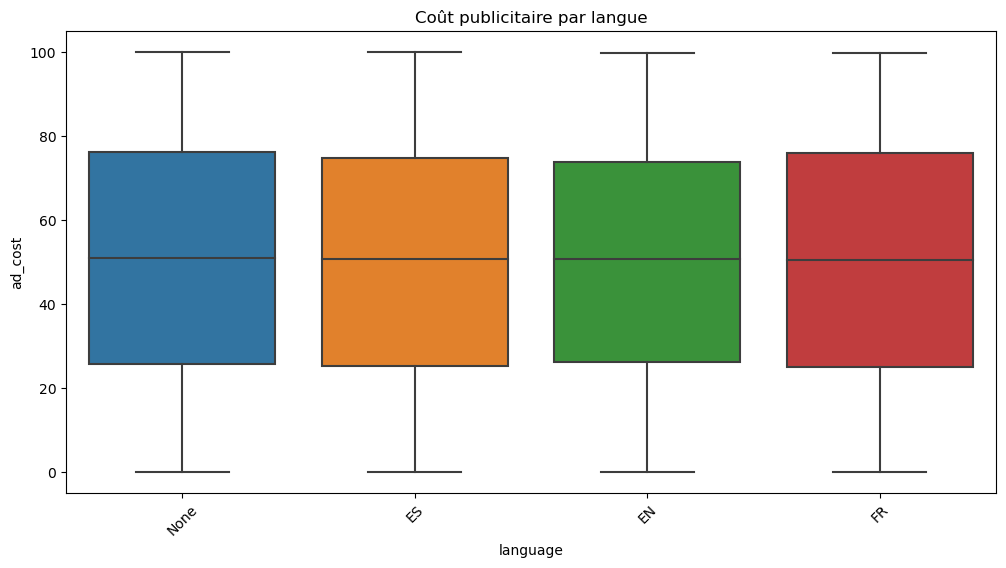

In [463]:
# Coût par langue

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_6clean, x='language', y='ad_cost', order=data_6clean['language'].value_counts().index)
plt.title('Coût publicitaire par langue')
plt.xticks(rotation=45)
plt.show()

# Data_7

### QR : 

### Importation de la base

In [510]:
data_7 = pd.read_csv('Data_7.csv')

data_7.head()

machine            timeStamp phase_A_temp (°F) phase_A_vib  \
0      v1                   v2                v2          v1   
1     NaN  2025-04-27 16:21:54            49.6°C       3.129   
2      M1  2025-04-25 13:21:54              89.4       3.357   
3     NaN  2025-04-25 01:21:54            94.8°C       0.487   
4     NaN  2025-04-27 03:21:54            22.3°C       4.955   

  phase_B_temp (°F)  phase_B_vib phase_C_temp (°F) phase_C_vib  \
0                v1          NaN                v1          v2   
1            92.7°C        1.297            77.4°C       1.986   
2              32.8        1.506            41.6°C         NaN   
3            40.6°C          NaN            86.7°C         NaN   
4              75.9        3.569            99.0°C       1.425   

                        extra  
0                          v1  
1   {'ok': True, 'msg': None}  
2  {'ok': False, 'msg': None}  
3   {'ok': True, 'msg': None}  
4  {'ok': False, 'msg': None}

### Nettoyage de la base

In [511]:
data_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   machine            1726 non-null   object 
 1   timeStamp          2548 non-null   object 
 2   phase_A_temp (°F)  2548 non-null   object 
 3   phase_A_vib        1307 non-null   object 
 4   phase_B_temp (°F)  2548 non-null   object 
 5   phase_B_vib        1273 non-null   float64
 6   phase_C_temp (°F)  2548 non-null   object 
 7   phase_C_vib        1272 non-null   object 
 8   extra              2548 non-null   object 
dtypes: float64(1), object(8)
memory usage: 179.3+ KB


In [512]:
data_7 = data_7.rename({"timeStamp" : "timestamp",
                        "phase_A_temp (°F)" : "phase_A_temp",
                        "phase_B_temp (°F)" : "phase_B_temp",
                        "phase_C_temp (°F)" : "phase_C_temp"}, axis = 1)

In [513]:
data_7 = data_7.drop(index=0)

In [514]:
data_7["timestamp"] = pd.to_datetime(data_7["timestamp"].str[:13])

In [515]:
data_7["phase_A_temp"] = data_7["phase_A_temp"].str.replace('°C', '')

In [516]:
data_7["phase_A_temp"] = data_7["phase_A_temp"].astype(float)

In [517]:
data_7["phase_A_vib"] = data_7["phase_A_vib"].astype(float)

In [518]:
data_7["phase_B_temp"] = data_7["phase_B_temp"].str.replace('°C', '')

In [519]:
data_7["phase_B_temp"] = data_7["phase_B_temp"].astype(float)

In [520]:
data_7["phase_C_temp"] = data_7["phase_C_temp"].str.replace('°C', '')

In [521]:
data_7["phase_C_temp"] = data_7["phase_C_temp"].astype(float)

In [522]:
data_7["phase_C_vib"] = data_7["phase_C_vib"].astype(float)

In [523]:
data_7.isnull().sum()

machine          822
timestamp          0
phase_A_temp       0
phase_A_vib     1241
phase_B_temp       0
phase_B_vib     1274
phase_C_temp       0
phase_C_vib     1276
extra              0
dtype: int64

In [524]:
mv7 = data_7.isnull().mean() * 100

mv7

machine         32.273263
timestamp        0.000000
phase_A_temp     0.000000
phase_A_vib     48.723989
phase_B_temp     0.000000
phase_B_vib     50.019631
phase_C_temp     0.000000
phase_C_vib     50.098155
extra            0.000000
dtype: float64

In [525]:
data_7["machine"].value_counts()

M2    866
M1    859
Name: machine, dtype: int64

In [526]:
data_7["machine"] = data_7["machine"].fillna('No Machine')

In [527]:
data_7["phase_A_vib"].value_counts()

2.548    3
3.163    3
3.766    3
2.570    3
2.607    3
        ..
0.207    1
2.545    1
4.658    1
3.478    1
3.462    1
Name: phase_A_vib, Length: 1146, dtype: int64

In [528]:
data_7["phase_A_vib"] = data_7["phase_A_vib"].fillna(data_7["phase_A_vib"].median())

In [529]:
data_7["phase_B_vib"].value_counts()

4.656    3
2.256    3
4.462    3
3.821    3
0.017    3
        ..
0.761    1
2.164    1
3.130    1
3.320    1
0.956    1
Name: phase_B_vib, Length: 1109, dtype: int64

In [530]:
data_7["phase_B_vib"] = data_7["phase_B_vib"].fillna(data_7["phase_B_vib"].median())

In [531]:
data_7["phase_C_vib"].value_counts()

1.740    4
2.145    3
2.751    3
3.882    3
4.691    3
        ..
0.943    1
3.392    1
4.845    1
4.319    1
2.786    1
Name: phase_C_vib, Length: 1131, dtype: int64

In [532]:
data_7["phase_C_vib"] = data_7["phase_C_vib"].fillna(data_7["phase_C_vib"].median())

In [533]:
data_7.isnull().sum()

machine         0
timestamp       0
phase_A_temp    0
phase_A_vib     0
phase_B_temp    0
phase_B_vib     0
phase_C_temp    0
phase_C_vib     0
extra           0
dtype: int64

In [534]:
data_7.duplicated().sum()

0

In [497]:
data_7.isnull().sum()

machine         0
timestamp       0
phase_A_temp    0
phase_A_vib     0
phase_B_temp    0
phase_B_vib     0
phase_C_temp    0
phase_C_vib     0
extra           0
dtype: int64

In [535]:
data_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 1 to 2547
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   machine       2547 non-null   object        
 1   timestamp     2547 non-null   datetime64[ns]
 2   phase_A_temp  2547 non-null   float64       
 3   phase_A_vib   2547 non-null   float64       
 4   phase_B_temp  2547 non-null   float64       
 5   phase_B_vib   2547 non-null   float64       
 6   phase_C_temp  2547 non-null   float64       
 7   phase_C_vib   2547 non-null   float64       
 8   extra         2547 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 179.2+ KB


### Analyse de la base

In [536]:
data_7.describe()

phase_A_temp  phase_A_vib  phase_B_temp  phase_B_vib  phase_C_temp  \
count   2547.000000  2547.000000   2547.000000  2547.000000   2547.000000   
mean      59.047036     2.521619     59.731802     2.614076     59.880016   
std       23.146596     1.003560     22.983549     1.018076     23.040909   
min       20.000000     0.004000     20.100000     0.001000     20.000000   
25%       38.900000     2.481500     39.500000     2.648000     40.000000   
50%       58.800000     2.548500     60.200000     2.648000     59.400000   
75%       79.200000     2.597500     79.850000     2.648000     79.500000   
max      100.000000     4.999000     99.900000     4.995000    100.000000   

       phase_C_vib  
count  2547.000000  
mean      2.451996  
std       1.017476  
min       0.003000  
25%       2.416000  
50%       2.416000  
75%       2.416000  
max       4.995000

C:\Users\Orcklyx O. Y. ANATO\AppData\Local\Temp\ipykernel_18172\2257135766.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\Orcklyx O. Y. ANATO\AppData\Local\Temp\ipykernel_18172\2257135766.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=temp[temp['phase'] == phase],
C:\Users\Orcklyx O. Y. ANATO\AppData\Local\Temp\ipykernel_18172\2257135766.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=vib[vib['phase'] == phase],
C:\Users\Orcklyx O. Y. ANATO\AppData\Local\Temp\ipykernel_18172\2257135766.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same ef

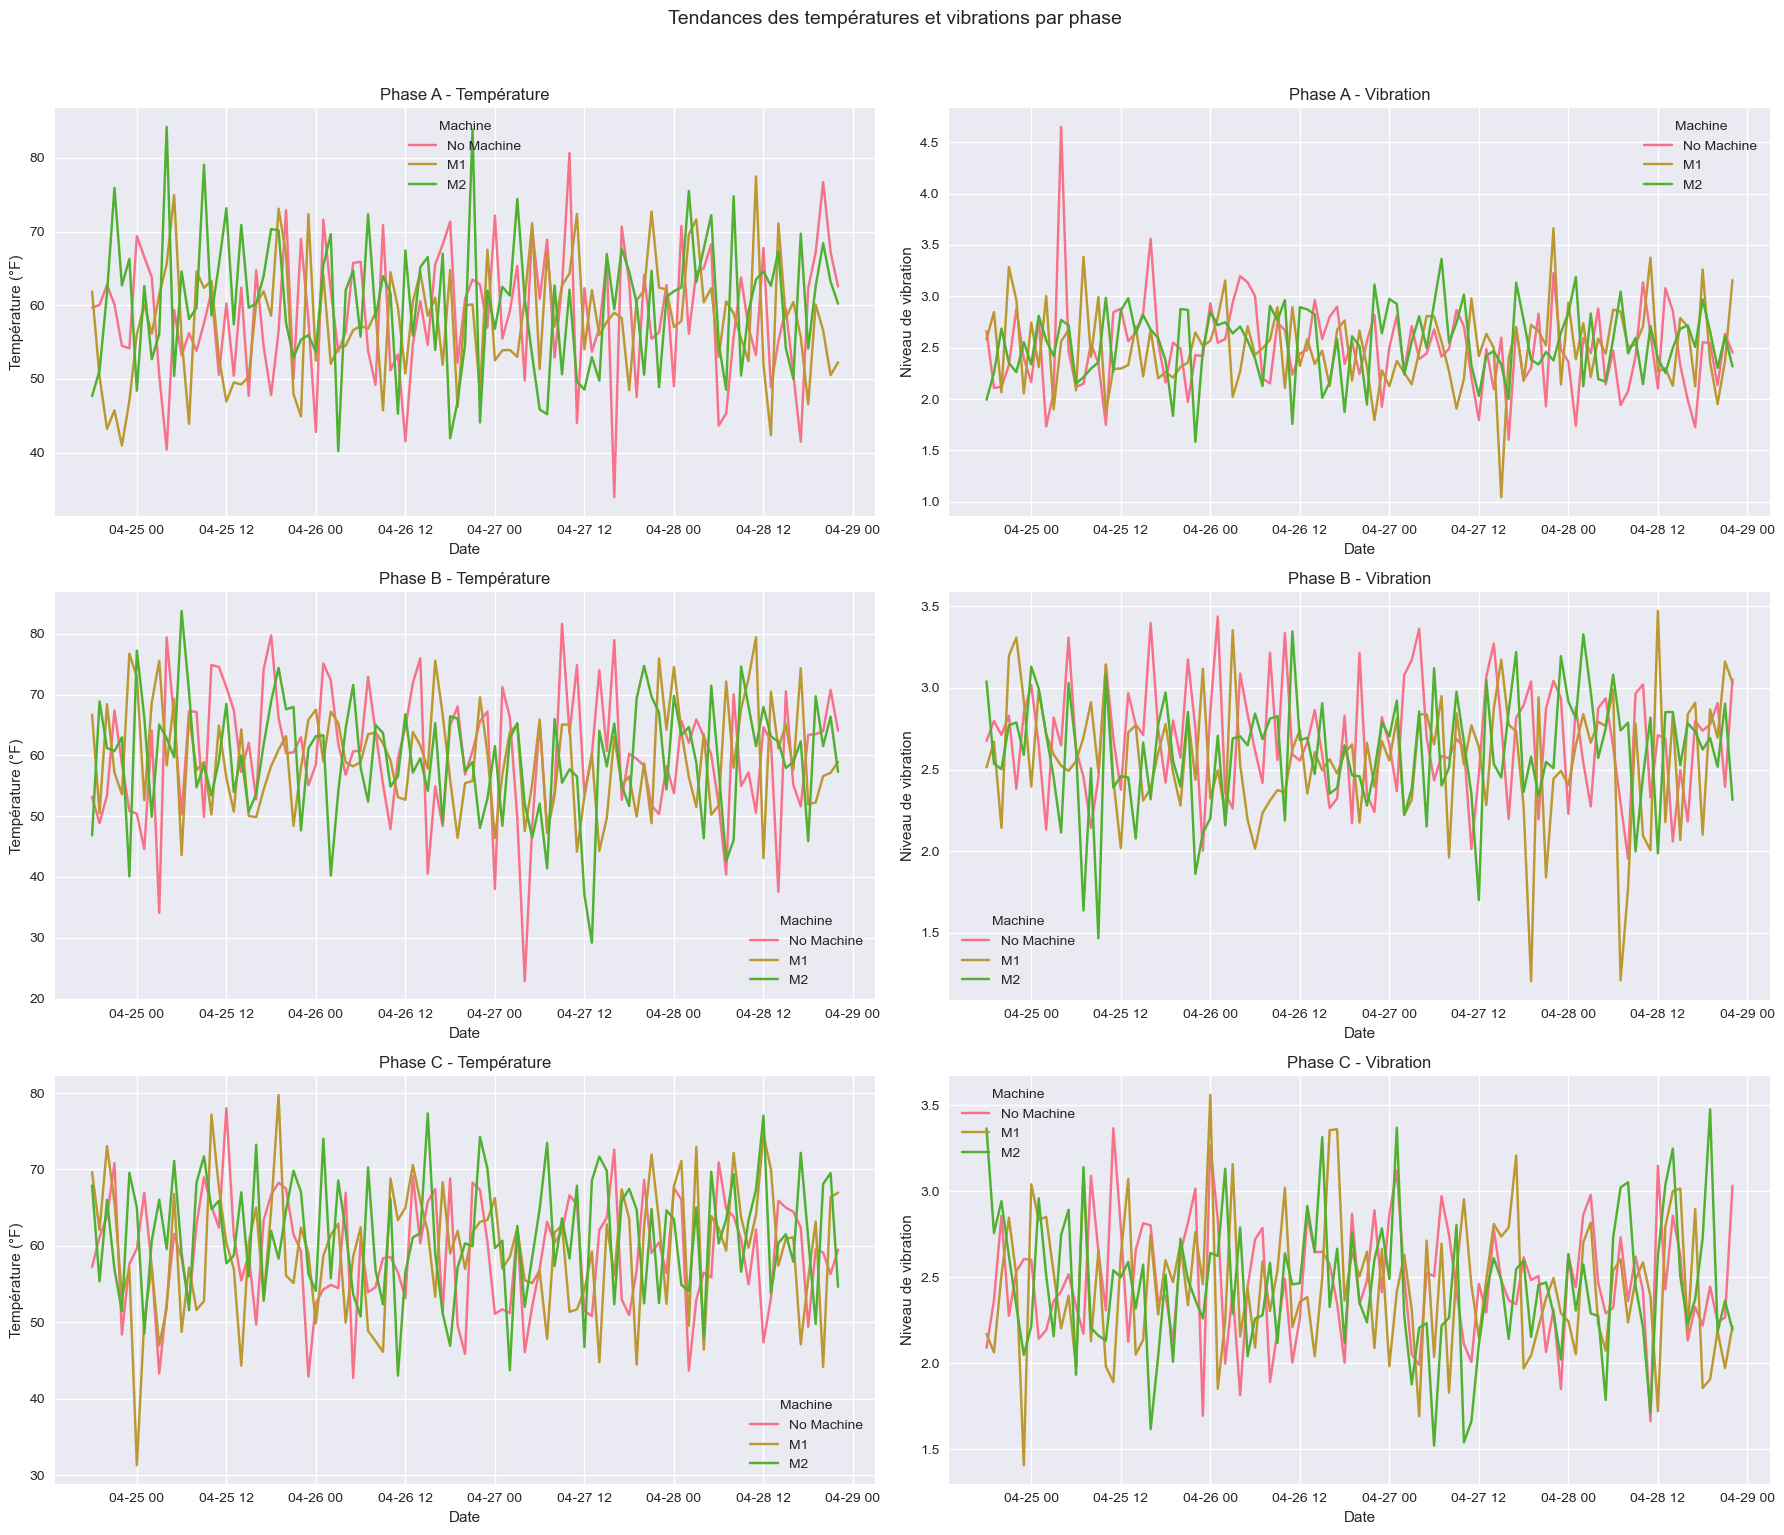

In [539]:
plt.style.use('seaborn')
sns.set_palette("husl")

fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Tendances des températures et vibrations par phase', y=1.02, fontsize=14)

temp = data_7.melt(id_vars=['machine', 'timestamp'], 
                  value_vars=['phase_A_temp', 'phase_B_temp', 'phase_C_temp'],
                  var_name='phase', value_name='temperature')

vib = data_7.melt(id_vars=['machine', 'timestamp'], 
                 value_vars=['phase_A_vib', 'phase_B_vib', 'phase_C_vib'],
                 var_name='phase', value_name='vibration')

temp['phase'] = temp['phase'].str.replace('phase_', '').str.replace('_temp', '').str.upper()
vib['phase'] = vib['phase'].str.replace('phase_', '').str.replace('_vib', '').str.upper()

phases = ['A', 'B', 'C']

for i, phase in enumerate(phases):
    sns.lineplot(data=temp[temp['phase'] == phase], 
                 x='timestamp', y='temperature', hue='machine',
                 ax=axes[i, 0], ci=None)
    axes[i, 0].set_title(f'Phase {phase} - Température')
    axes[i, 0].set_xlabel('Date')
    axes[i, 0].set_ylabel('Température (°F)')
    axes[i, 0].grid(True)
    axes[i, 0].legend(title='Machine')
    
    sns.lineplot(data=vib[vib['phase'] == phase], 
                 x='timestamp', y='vibration', hue='machine',
                 ax=axes[i, 1], ci=None)
    axes[i, 1].set_title(f'Phase {phase} - Vibration')
    axes[i, 1].set_xlabel('Date')
    axes[i, 1].set_ylabel('Niveau de vibration')
    axes[i, 1].grid(True)
    axes[i, 1].legend(title='Machine')

plt.tight_layout()
plt.show()

# Data_8

### QR : 

### Importation de la base

In [255]:
data_8 = pd.read_csv('Data_8.csv')

data_8.head()

Station                    Datetime              Sensors  \
0      S1            28/04/2025 22:21       T194|T145|T188   
1      S1            28/04/2025 22:21                 T147   
2      S2  2025-04-28 22:21:54.986076            T101|T193   
3      S2            28/04/2025 22:21  T116|T116|T100|T100   
4      S1            28/04/2025 22:21            T149|T138   

                Values Status          Note  Meta->Info  
0       36.5,24.4,35.3     OK           NaN  {"ver": 1}  
1                  8.1    NaN           NaN  {"ver": 3}  
2            -7.0,-3.2     OK           NaN  {"ver": 3}  
3  -7.4,-7.1,38.9,32.3     OK           NaN  {"ver": 1}  
4            -18.7,4.9     OK  Check sensor  {"ver": 2}

### Nettoyage de la base

In [541]:
data_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69691 entries, 0 to 69690
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Station     46489 non-null  object
 1   Datetime    69691 non-null  object
 2   Sensors     69691 non-null  object
 3   Values      69691 non-null  object
 4   Status      46408 non-null  object
 5   Note        34736 non-null  object
 6   Meta->Info  69691 non-null  object
dtypes: object(7)
memory usage: 3.7+ MB


In [542]:
data_8["Datetime"] = data_8["Datetime"].str.replace('/', '-')

In [543]:
data_8["Datetime"] = pd.to_datetime(data_8["Datetime"].str[:13])

In [553]:
data_8.isnull().sum()

Station       0
Datetime      0
Sensors       0
Values        0
Status        0
Note          0
Meta->Info    0
dtype: int64

In [546]:
mv8 = data_8.isnull().mean() * 100

mv8

Station       33.292678
Datetime       0.000000
Sensors        0.000000
Values         0.000000
Status        33.408905
Note          50.157122
Meta->Info     0.000000
dtype: float64

In [547]:
data_8["Station"].value_counts()

S1    23366
S2    23123
Name: Station, dtype: int64

In [548]:
data_8["Station"] = data_8["Station"].fillna('No Station')

In [549]:
data_8["Status"].value_counts()

OK      23268
FAIL    23140
Name: Status, dtype: int64

In [550]:
data_8["Status"] = data_8["Status"].fillna('No Status')

In [551]:
data_8["Note"].value_counts()

Check sensor    34736
Name: Note, dtype: int64

In [552]:
data_8["Note"] = data_8["Note"].fillna('Check sensor')

In [554]:
data_8.duplicated().sum()

103

In [556]:
data_8clean = data_8.drop_duplicates()

In [558]:
data_8clean.head(2)

Station            Datetime         Sensors          Values     Status  \
0      S1 2025-04-28 22:00:00  T194|T145|T188  36.5,24.4,35.3         OK   
1      S1 2025-04-28 22:00:00            T147             8.1  No Status   

           Note  Meta->Info  
0  Check sensor  {"ver": 1}  
1  Check sensor  {"ver": 3}